## I. Introduction

Name    : Theo Nugraha

Batch   : RMT-021

Deployment Link : [HUGGING FACE - Prediction of Credit Card Default](https://huggingface.co/spaces/nugrahatheo/Prediction-of-Credit-Card-Default)

### I.I. Project Background

I am a data scientist with a bank as a client. The client asked me to analyze and predict the possibility of credit card defaults from its customers. The client allows me to use any method as long as the results of my prediction can provide the highest accuracy value, so that the bank can quickly decide the possibility of default or not. As the material to build the model, I was given a credit card dataset from the bank.

### I.II. About Dataset

[**SOURCE DATASET**](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=credit_card_default&page=table)

**QUERY SQL**

``````
SELECT limit_balance, 
CAST(sex AS INT64) AS sex, 
CAST(education_level AS INT64) AS education_level, 
CAST(marital_status AS INT64) AS marital_status, 
age, 
pay_0, 
pay_2, 
pay_3, 
pay_4, 
CAST(pay_5 AS FLOAT64) AS pay_5, 
CAST(pay_6 AS FLOAT64) AS pay_6, 
bill_amt_1, 
bill_amt_2, 
bill_amt_3, 
bill_amt_4, 
bill_amt_5, 
bill_amt_6, 
pay_amt_1, 
pay_amt_2, 
pay_amt_3, 
pay_amt_4, 
pay_amt_5, 
pay_amt_6, 
CAST(default_payment_next_month AS INT64) AS default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default` LIMIT 41811;



### I.III. Objective

This project aims to predict credit card customer defaults with an algorithm that has the best accuracy rate.

## II. Import Library

In [3]:
#Import Library

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score

## III. Data Loading

In [4]:
# Data Loading

df = pd.read_csv('h8dsft_P1M1_theo.csv')
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0


This dataset has 24 columns or features and 2965 rows of data.

In [5]:
# Displays the top 10 data

df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0.0,...,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [6]:
# Display the bottom 10 data

df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2956,100000.0,1,3,1,40.0,0.0,0.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0,0
2957,30000.0,2,3,1,48.0,1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0
2958,80000.0,2,3,1,39.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2959,20000.0,1,3,2,26.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0,0
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,...,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


In [7]:
# Duplicate Dataset

data_backup = df.copy()

In [8]:
# Check Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In this dataset, there are 24 columns with 20 columns of float data type and 4 columns of integer data type.

In [9]:
# Check Missing Value

df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

There is no missing value in this dataset

In [10]:
# Duplication Check 

df.duplicated().sum()

1

Based on the duplication check, there is 1 duplicated rows. So, we will remove the duplicate and keep the first one.

In [11]:
# Show duplicated row

df[df.duplicated(keep=False)]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2806,200000.0,2,1,1,34.0,1.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2815,200000.0,2,1,1,34.0,1.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [12]:
# Remove duplicate data

df.drop_duplicates(keep='first', inplace=True)

In [13]:
# Duplication Check 

df.duplicated().sum()

0

Now, there is no duplicate data on this dataset.

Based on the info from the source dataset, we can know that there are features that need to be converted to categorical:

- **sex**                        : (1)male & (2)female

- **education_level**            : (1)graduate school, (2)university, (3)high school, (4)others, (5)unknown, (6)unknown

- **marital_status**             : (1)married, (2)single, (3)others

- **pay_0 - pay_6**              : (-1)pay duly, (1)payment delay for one month, (2)payment delay for two months, ... (8)payment delay for eight months, (9)payment delay for nine months and above

- **default_payment_next_month** : (1)yes & (2)no

In [14]:
# Cardinality Check

print('Shape of Dataset : ', df.shape)
print('')

for col in df.columns.tolist():
  print('Col : ', col)
  print('Length Unique Value : ', df[col].unique())
  print('')

Shape of Dataset :  (2964, 24)

Col :  limit_balance
Length Unique Value :  [ 80000. 200000.  20000. 260000. 150000. 300000. 130000. 500000. 230000.
 460000. 780000. 170000. 320000. 290000. 240000. 340000. 360000. 380000.
 180000. 100000.  90000.  50000. 160000.  70000. 280000. 220000.  30000.
 120000.  10000. 470000. 310000. 140000.  60000. 110000. 430000. 210000.
 490000. 330000. 250000. 400000. 370000. 440000. 700000. 530000. 390000.
 410000. 270000. 560000.  40000. 680000. 480000. 190000. 350000. 420000.
 510000. 800000. 450000. 750000. 620000.]

Col :  sex
Length Unique Value :  [1 2]

Col :  education_level
Length Unique Value :  [6 4 1 2 3 5 0]

Col :  marital_status
Length Unique Value :  [1 2 3 0]

Col :  age
Length Unique Value :  [54. 49. 22. 33. 32. 45. 58. 39. 48. 34. 47. 46. 30. 35. 55. 42. 56. 31.
 53. 40. 36. 51. 37. 44. 24. 38. 26. 25. 23. 27. 28. 29. 41. 63. 50. 43.
 66. 61. 52. 62. 69. 21. 65. 57. 64. 67. 60. 59. 68.]

Col :  pay_0
Length Unique Value :  [ 0.  2.  1.

Based on the cardinality check, there are values that are not listed in the categorical index, namely :
- in the `education_level` feature there are numbers 0, 5 and 6, we will put these numbers into number 4 to avoid cardinality.
- in `marital_status` feature there is 0, we will put the number to 3 to avoid cardinality.

## IV. Exploratory Data Analysis (EDA)

### IV.I. Basic Statistic Checking

In [15]:
# Check Basic Statistic

df.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,...,2964.000000,2964.000000,2964.000000,2964.000000,2.964000e+03,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000
mean,163356.950067,1.607625,1.849865,1.560054,35.193657,0.004723,-0.121795,-0.141026,-0.184548,-0.224696,...,44104.558367,40969.898448,39786.491228,6351.044872,6.274611e+03,5152.234818,4562.914980,4914.944332,5384.517544,0.214238
std,125049.701016,0.488362,0.778159,0.522304,9.110949,1.114434,1.180479,1.183337,1.178049,1.158739,...,61912.600106,58276.878626,57308.498646,20888.933729,2.888432e+04,14289.177313,13283.476236,16736.920951,17278.585006,0.410362
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2585.000000,1974.500000,1433.000000,1013.000000,9.975000e+02,479.250000,313.750000,325.250000,175.250000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19895.000000,18819.500000,18511.500000,2238.000000,2.182500e+03,1997.000000,1600.000000,1646.500000,1626.500000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58638.500000,53414.500000,52297.000000,5089.500000,5.000000e+03,4500.000000,4000.250000,4021.000000,4081.750000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


Based on the basic statistics check above, there are several findings, namely:
- Based on the distribution, almost all features appear to be fairly symmetrical. This is because the mean and median (50th percentile) values are close together.
- All `bill_amt` & `pay_amt` features appear to be insufficiently symmetrical. This is because the mean and median (50th percentile) values are far apart.

### IV.II. Plotting

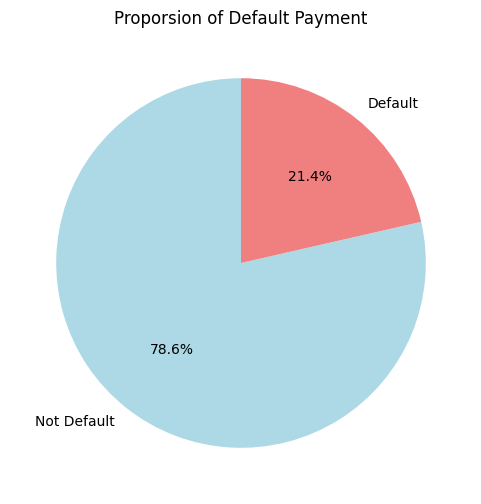

In [16]:
# Pie chart `default_payment_next_month`

count_data = df["default_payment_next_month"].value_counts()

# Make pie chart
plt.figure(figsize=(6, 6))
plt.pie(count_data, labels=["Not Default", "Default"], autopct="%1.1f%%", startangle=90, colors=["lightblue", "lightcoral"])
plt.title("Proporsion of Default Payment")
plt.show()

Based on the diagram above, we can understand that the amount of data in class 0 (Not Default) is more than class 1 (Default).

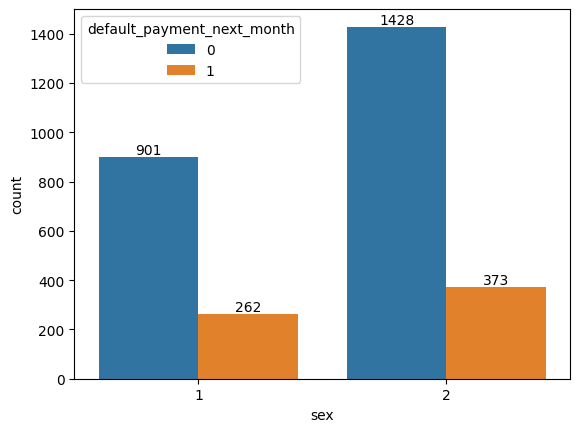

In [17]:
# Count Plot `default_payment_next_month` based on `sex`

default = sns.countplot(data=df, x="sex", hue="default_payment_next_month")

for container in default.containers:
    default.bar_label(container)

plt.show()

Based on the diagram above, we can know that:
1. The number of defaults with female gender is more than the number of defaults with male gender.
2. The number of non-defaulters with female gender is more than the number of non-defaulters with male gender.

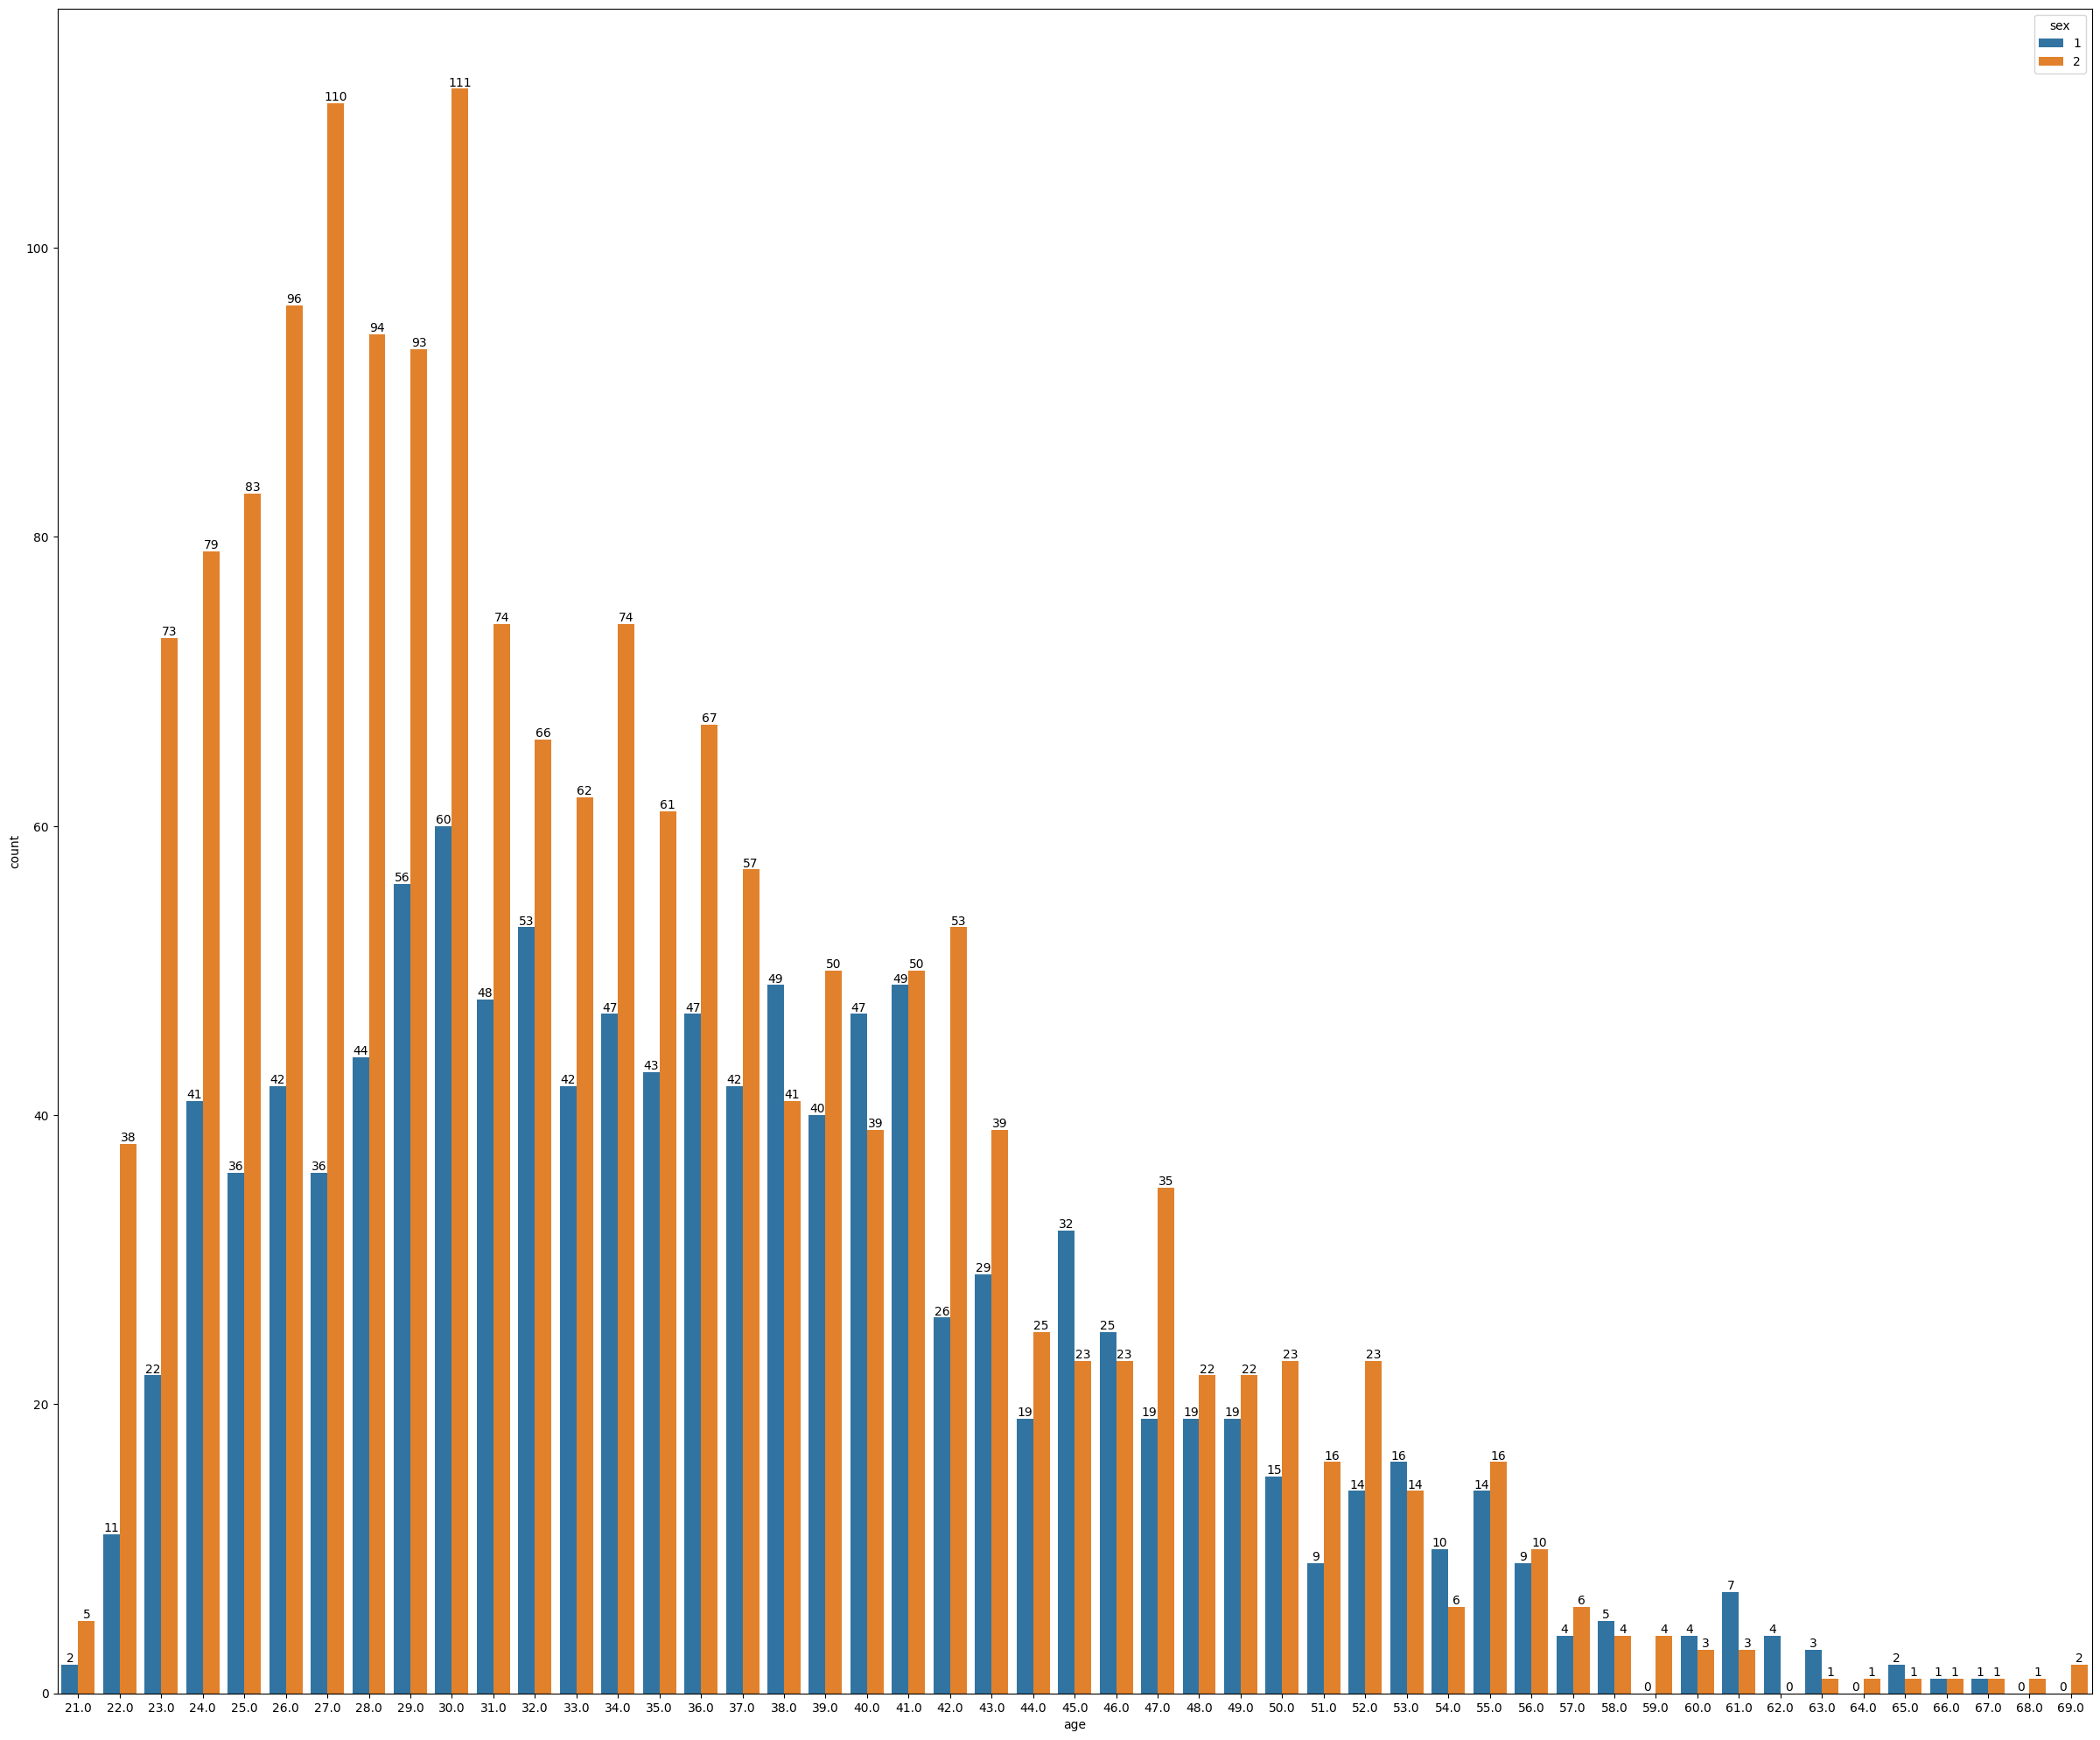

In [18]:
# Count Plot `age` based on `sex`

plt.figure(figsize=(30,25))
age = sns.countplot(data=df, x="age", hue="sex")

for container in age.containers:
    age.bar_label(container)

plt.show()

Based on the diagram above, we can find out that the most credit card customers are female and aged 30 years, totaling 111 customers. The most male customers are also 30 years old and totaling 60 customers.

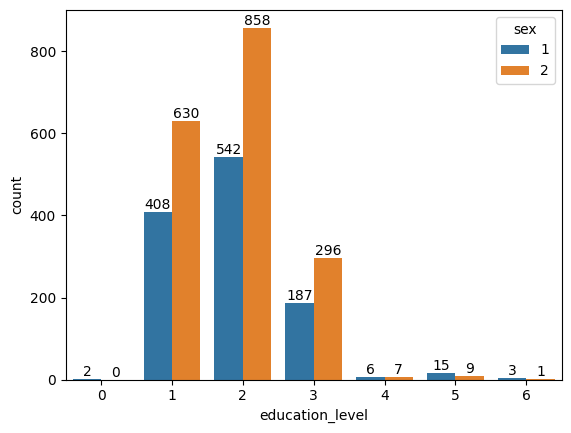

In [19]:
# Count Plot `education_level` based on `sex`

edu = sns.countplot(data=df, x="education_level", hue="sex")

for container in edu.containers:
    edu.bar_label(container)

plt.show()

Based on the diagram above, we can understand that the most customers are customers who are still students and are female, as well as customers who are male.

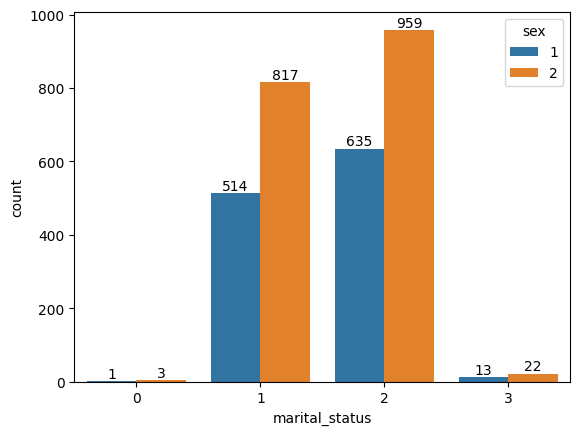

In [20]:
# Count Plot `marital_status` based on `sex`

mar = sns.countplot(data=df, x="marital_status", hue="sex")

for container in mar.containers:
    mar.bar_label(container)

plt.show()

Based on the diagram above, we can understand that customers with female gender and single status are the most customers, as well as customers with male gender.

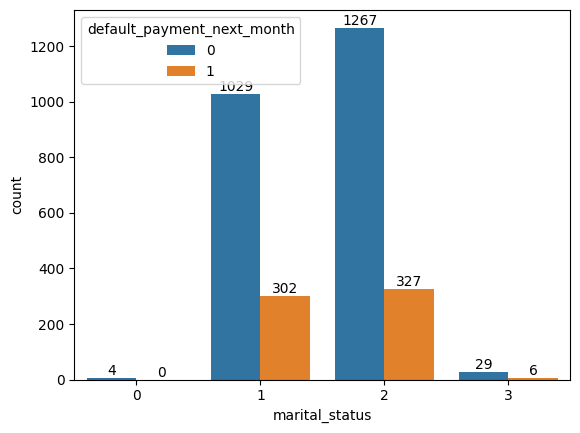

In [21]:
# Count Plot `marital_status` based on `default_payment_next_month`

mar_def = sns.countplot(data=df, x="marital_status", hue="default_payment_next_month")

for container in mar_def.containers:
    mar_def.bar_label(container)

plt.show()

Based on the diagram above, we can find out that customers who are single are the customers who default the most and the most do not default.

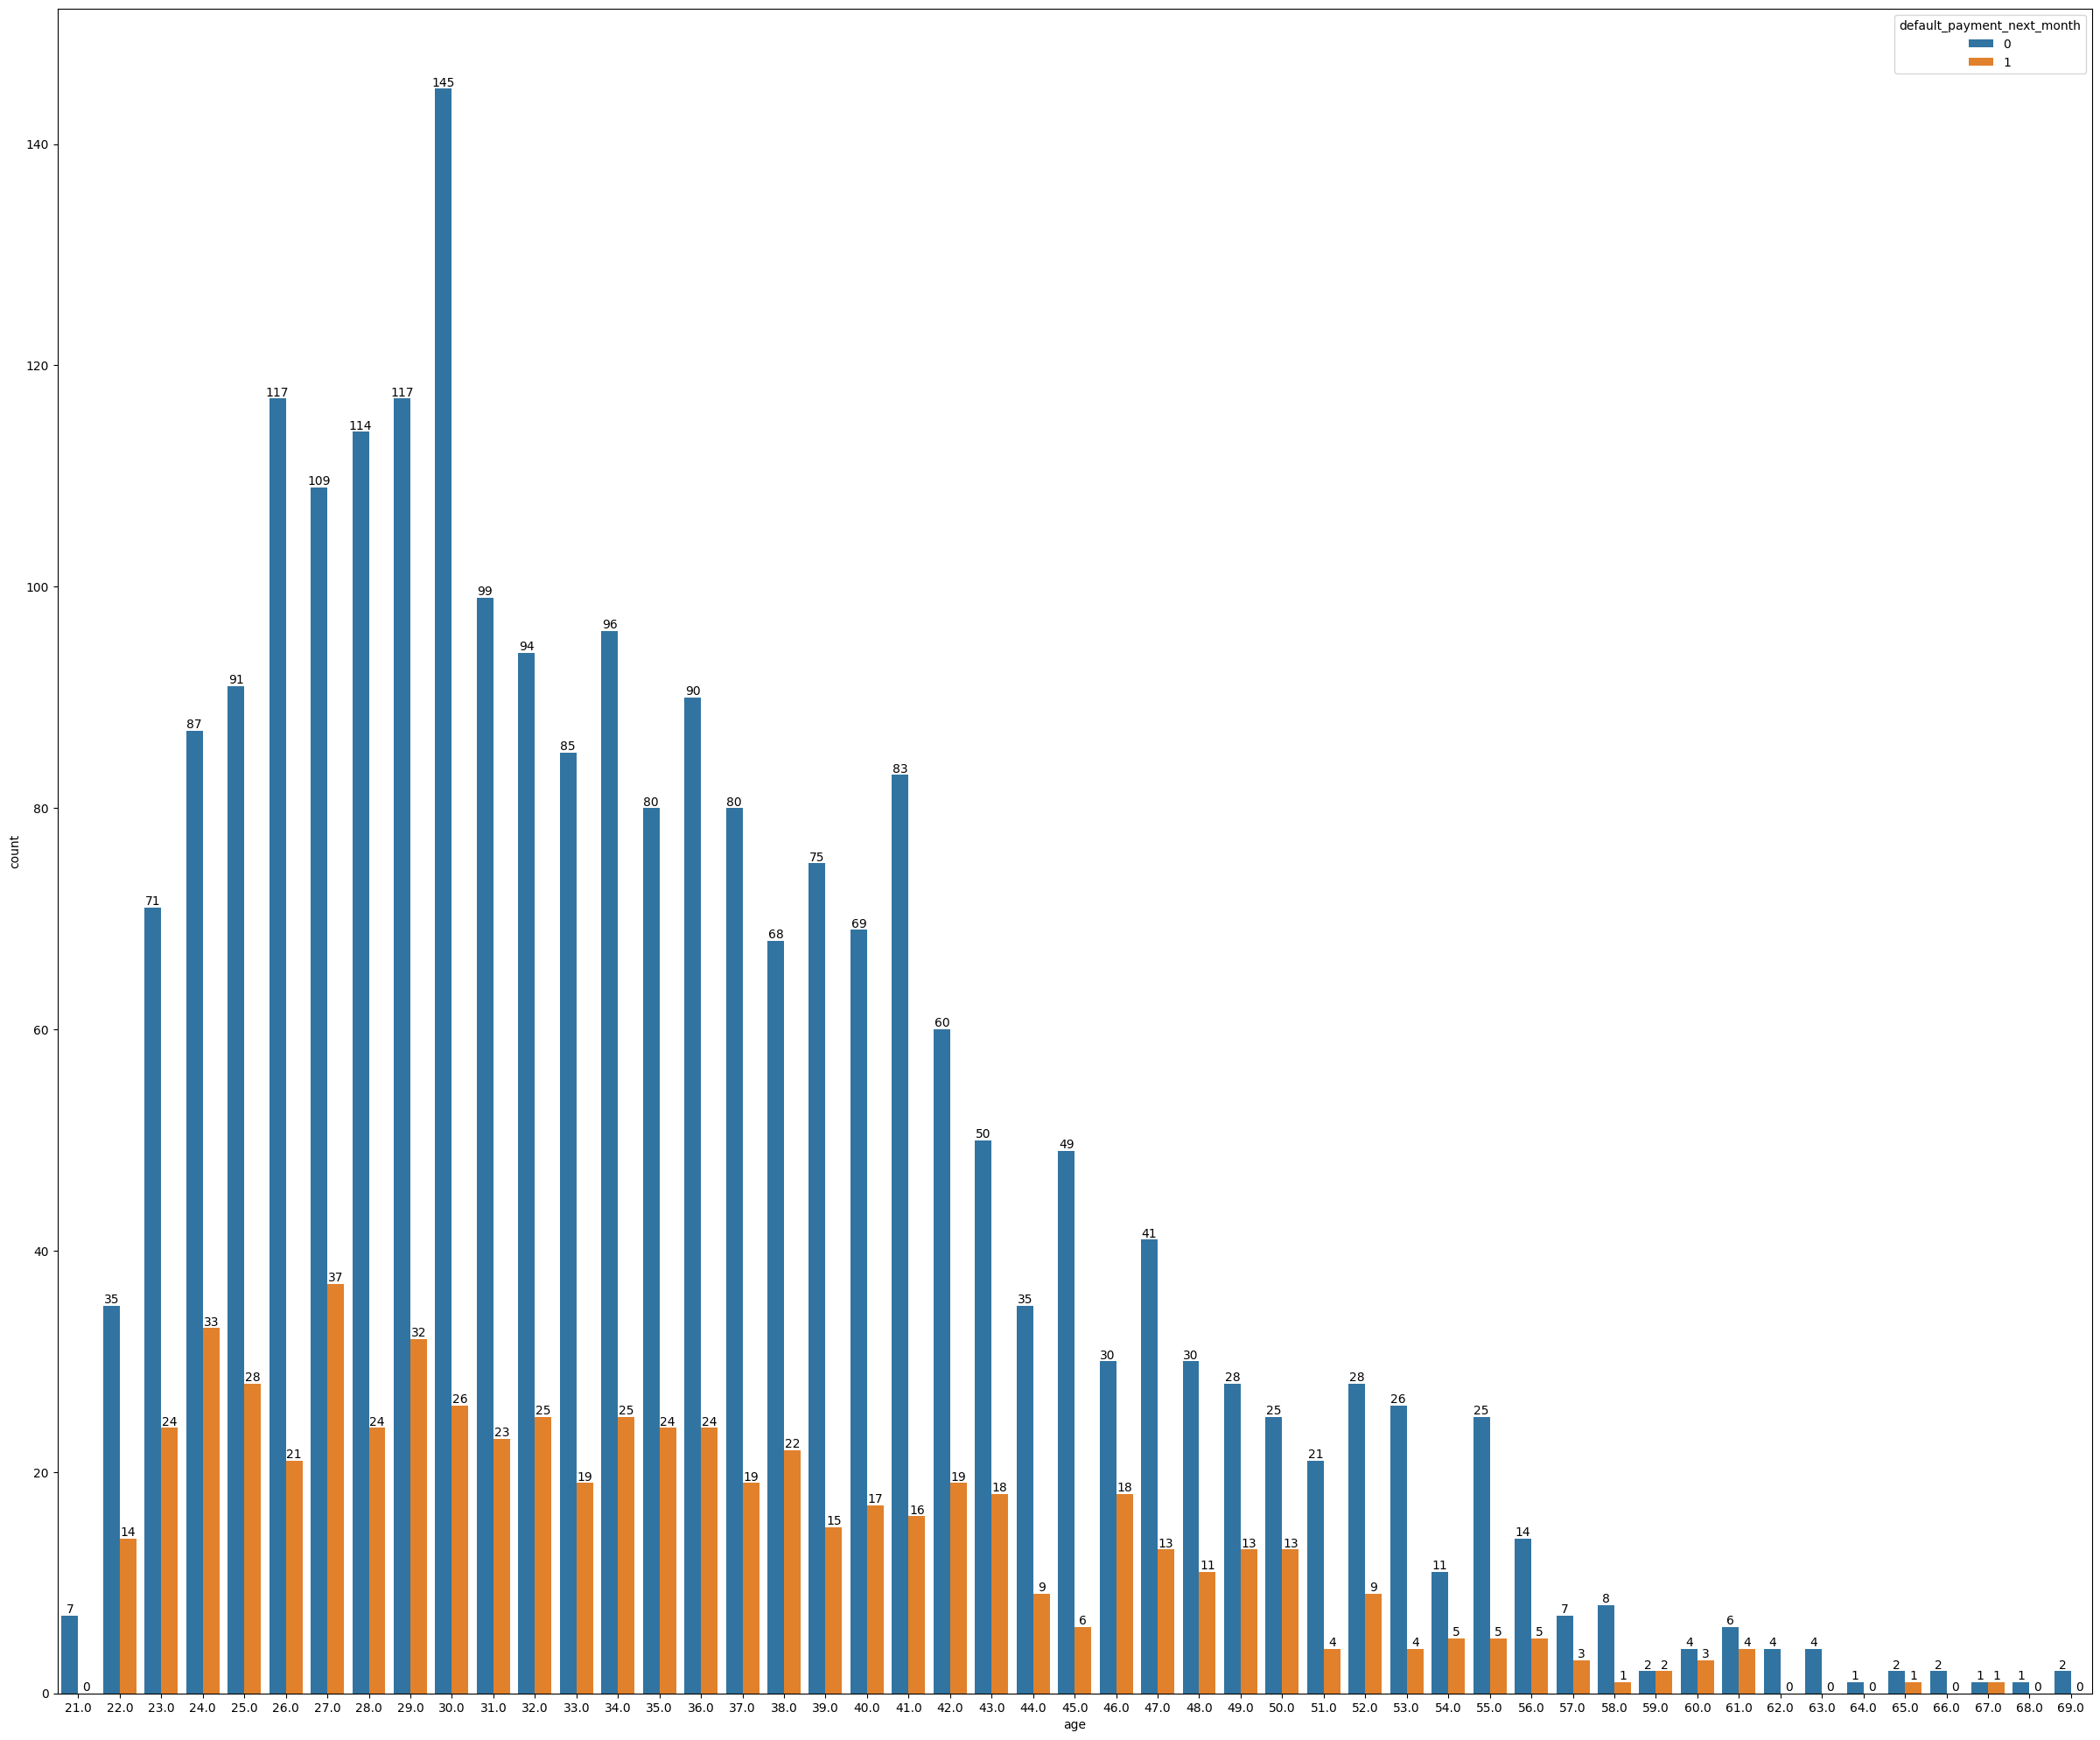

In [22]:
# Count Plot `age` based on `default_payment_next_month`

plt.figure(figsize=(30,25))
mar_age = sns.countplot(data=df, x="age", hue="default_payment_next_month")

for container in mar_age.containers:
    mar_age.bar_label(container)

plt.show()

Based on the diagram above, we can find out that customers aged 30 years are the most customers who do not default, while customers aged 27 are the most customers who default.

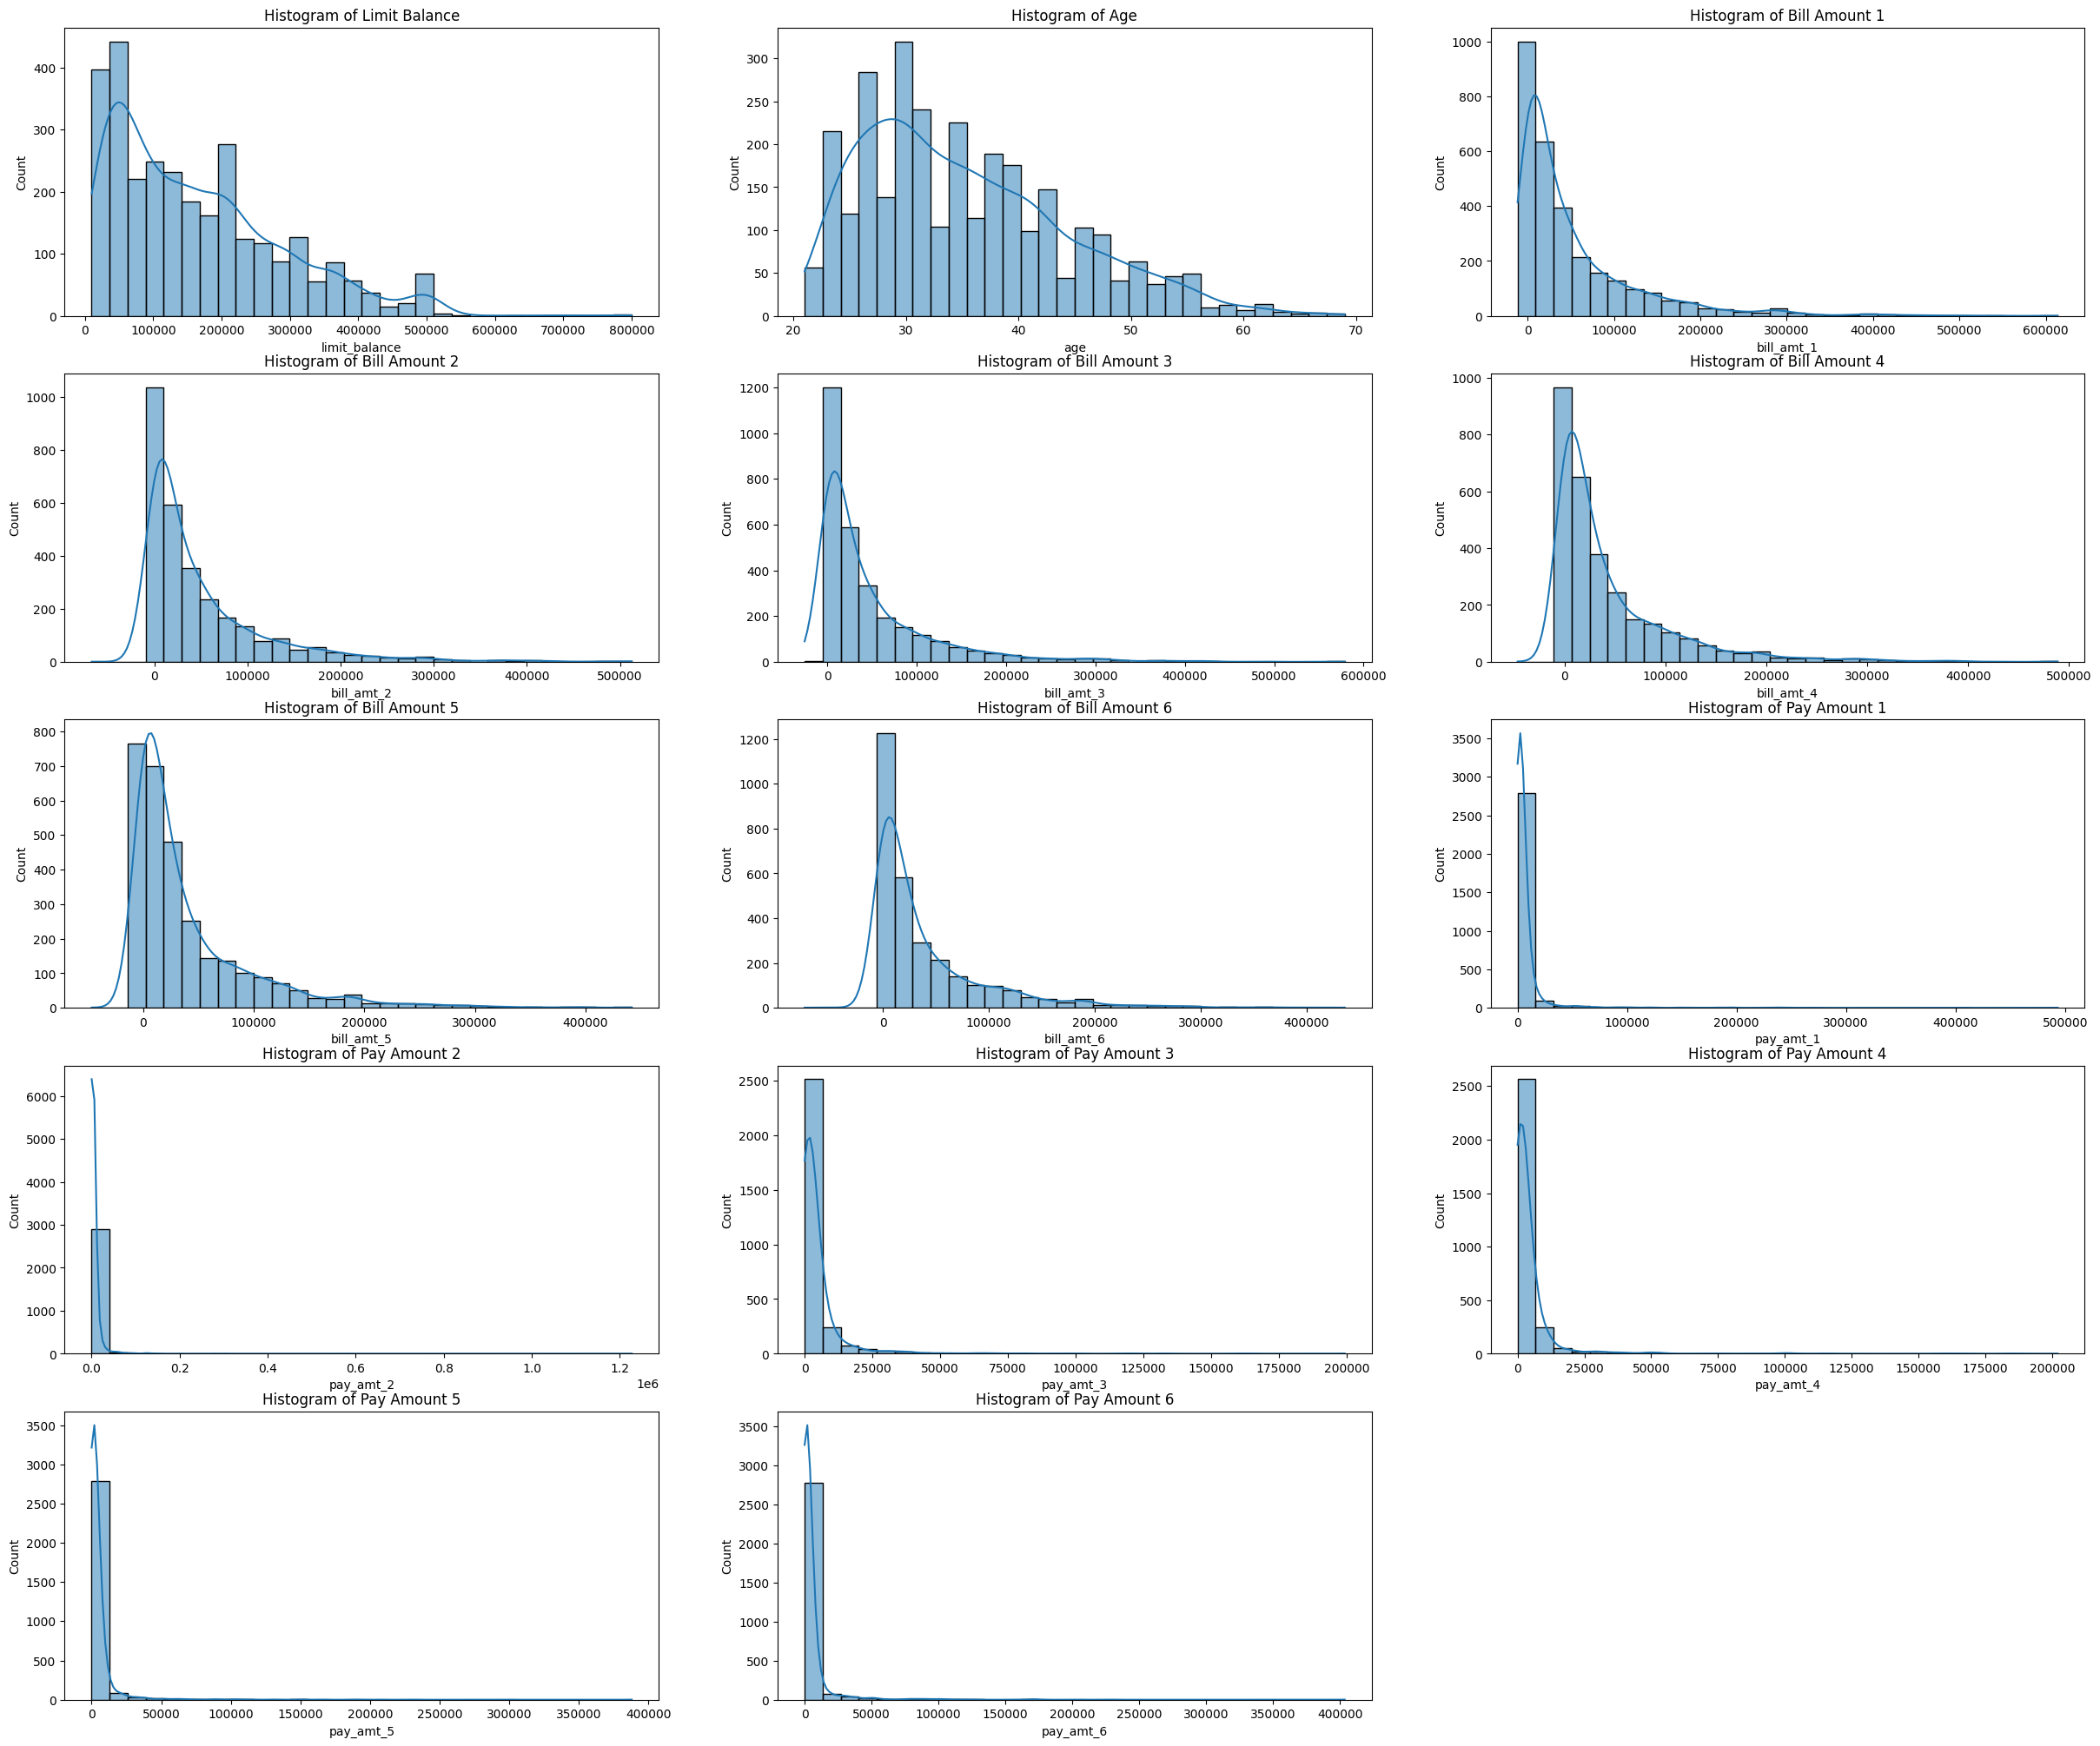

In [23]:
# Create Histogram

plt.figure(figsize=(30,25))

plt.subplot(5,3,1)
sns.histplot(df['limit_balance'], kde=True, bins = 30)
plt.title('Histogram of Limit Balance')

plt.subplot(5,3,2)
sns.histplot(df['age'], kde=True, bins = 30)
plt.title('Histogram of Age')

plt.subplot(5,3,3)
sns.histplot(df['bill_amt_1'], kde=True, bins = 30)
plt.title('Histogram of Bill Amount 1')

plt.subplot(5,3,4)
sns.histplot(df['bill_amt_2'], kde=True, bins = 30)
plt.title('Histogram of Bill Amount 2')

plt.subplot(5,3,5)
sns.histplot(df['bill_amt_3'], kde=True, bins = 30)
plt.title('Histogram of Bill Amount 3')

plt.subplot(5,3,6)
sns.histplot(df['bill_amt_4'], kde=True, bins = 30)
plt.title('Histogram of Bill Amount 4')

plt.subplot(5,3,7)
sns.histplot(df['bill_amt_5'], kde=True, bins = 30)
plt.title('Histogram of Bill Amount 5')

plt.subplot(5,3,8)
sns.histplot(df['bill_amt_6'], kde=True, bins = 30)
plt.title('Histogram of Bill Amount 6')

plt.subplot(5,3,9)
sns.histplot(df['pay_amt_1'], kde=True, bins = 30)
plt.title('Histogram of Pay Amount 1')

plt.subplot(5,3,10)
sns.histplot(df['pay_amt_2'], kde=True, bins = 30)
plt.title('Histogram of Pay Amount 2')

plt.subplot(5,3,11)
sns.histplot(df['pay_amt_3'], kde=True, bins = 30)
plt.title('Histogram of Pay Amount 3')

plt.subplot(5,3,12)
sns.histplot(df['pay_amt_4'], kde=True, bins = 30)
plt.title('Histogram of Pay Amount 4')

plt.subplot(5,3,13)
sns.histplot(df['pay_amt_5'], kde=True, bins = 30)
plt.title('Histogram of Pay Amount 5')

plt.subplot(5,3,14)
sns.histplot(df['pay_amt_6'], kde=True, bins = 30)
plt.title('Histogram of Pay Amount 6')

plt.show;


Based on the histogram above, we can see that the features `limit_balance`, `age`, `bill_amt_2`, `bill_amt_3`, `bill_amt_4`, `bill_amt_5` and `bill_amt_6` data distribution tends to be normal. While the features `bill_amt_1`, `pay_amt_1`, `pay_amt_2`, `pay_amt_3`, `pay_amt_4`, `pay_amt_5` and `pay_amt_6` data distribution tends to be abnormal.

### IV.III. Correlation Feature Check

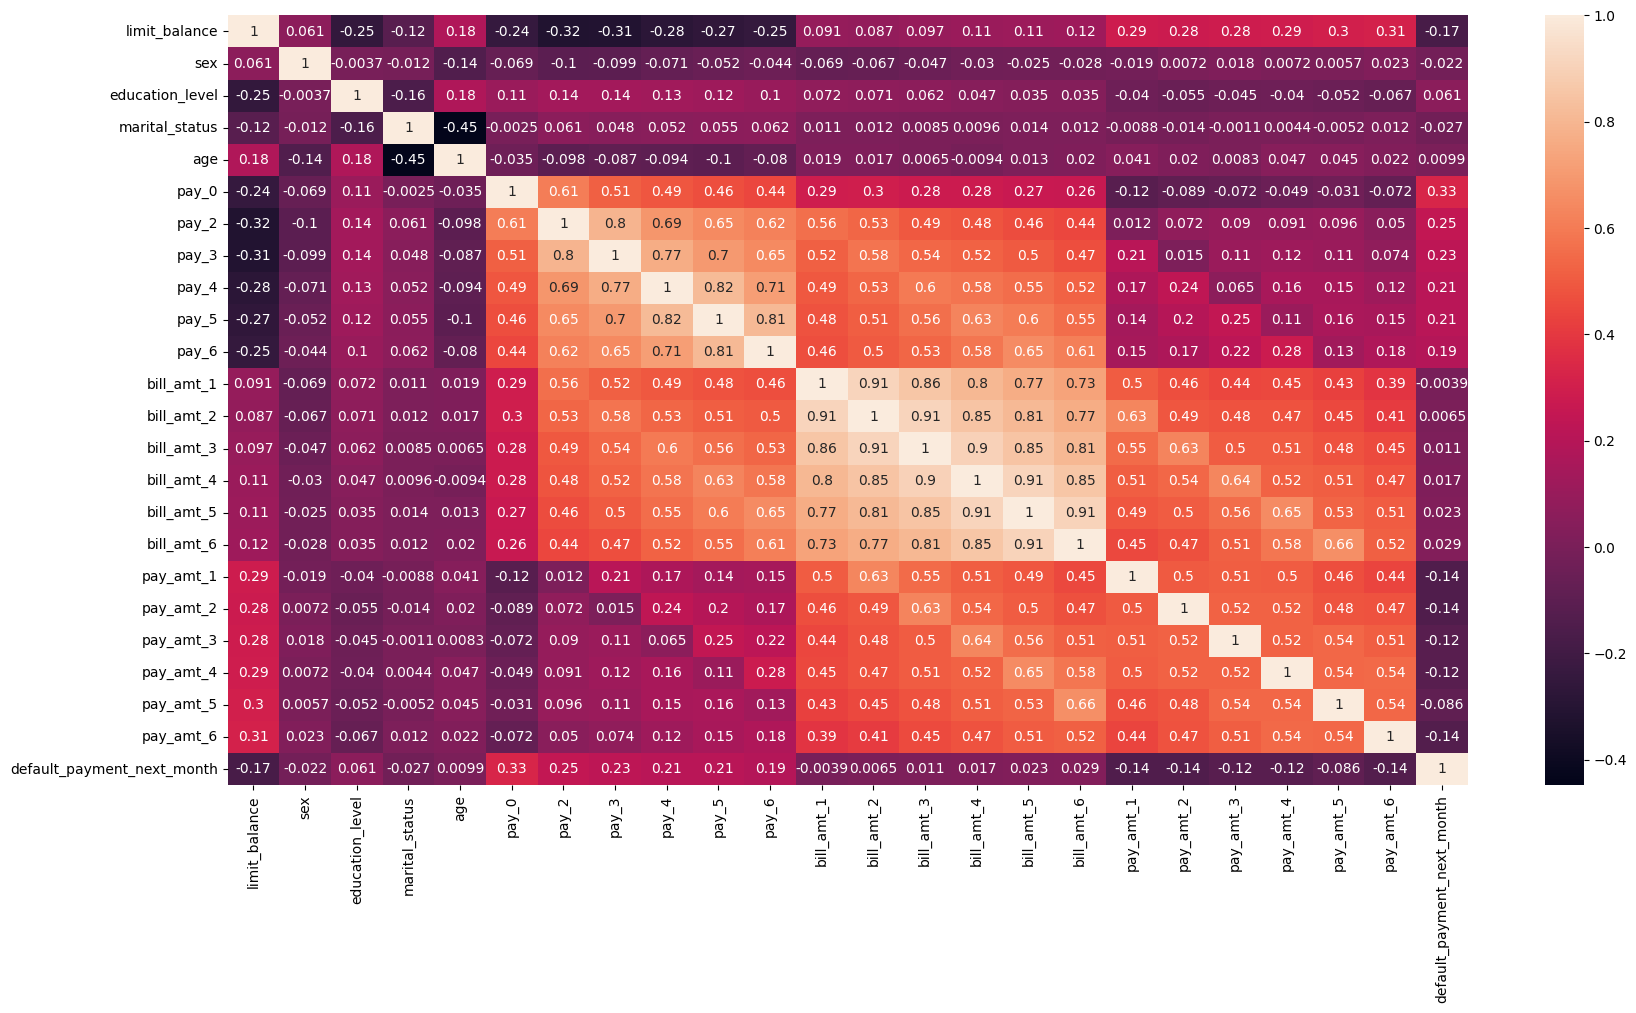

In [24]:
# Correlation feature checking

fig,ax = plt.subplots(figsize=[20,10])

corr = df.corr(method='spearman')

ax = sns.heatmap(corr,annot=True)
plt.show()

Based on the correlation test of all features against the `default_payment_next_month` feature using the `spearman` method, we can conclude that :

1. There is a positive correlation between the `default_payment_next_month` feature and the feature:
- `education_level` of 0.061, which means a weak positive correlation.
- `age` of 0.0099, which means a weak positive correlation.
- `pay_0` of 0.33, which means a strong positive correlation.
- `pay_2` of 0.25, which means a strong positive correlation.
- `pay_3` of 0.23, which means a strong positive correlation.
- `pay_4` of 0.21, which means a strong positive correlation.
- `pay_5` of 0.21, which means a strong positive correlation.
- `pay_6` of 0.19, which means a strong positive correlation.
- `bill_amt_2` of 0.0065, which means a weak positive correlation.
- `bill_amt_3` of 0.011, which means a weak positive correlation.
- `bill_amt_4` of 0.017, which means a weak positive correlation.
- `bill_amt_5` of 0.023, which means a weak positive correlation.
- `bill_amt_6` of 0.029, which means a weak positive correlation.

2. There is a negative correlation between the feature `default_payment_next_month` and the feature:
- `limit_balance` of -0.17, which means a strong negative correlation.
- `sex` of -0.022, which means a weak negative correlation.
- `marital_status` of -0.027, which means a weak negative correlation.
- `bill_amt_1` of -0.0039, which means a weak negative correlation.
- `pay_amt_1` of -0.14, which means a strong negative correlation.
- `pay_amt_2` of -0.14, which means a strong negative correlation.
- `pay_amt_3` of -0.12, which means a strong negative correlation.
- `pay_amt_4` of -0.12, which means a strong negative correlation.
- `pay_amt_5` of -0.086, which means a weak negative correlation.
- `pay_amt_6` of -0.14, which means a strong negative correlation.

## V. Feature Engineering

Before I do the data splitting, the first thing I will do is:
1. Rename the `default_payment_next_month` feature to `result` to make it easier and more concise.
2. Handling cardinality on `education_level` and `marital_status` features.

In [25]:
# Rename feature / column name

df.rename(columns={"default_payment_next_month": "result"}, inplace=True)

In [26]:
# Unique value checking on `education_level`

df['education_level'].unique()

array([6, 4, 1, 2, 3, 5, 0])

In [27]:
# Unique value checking on `marital_status`

df['marital_status'].unique()

array([1, 2, 3, 0])

In [28]:
# Handling cardinality

df['education_level'] = np.where(df['education_level'] == 5, 4, df['education_level'])
df['education_level'] = np.where(df['education_level'] == 6, 4, df['education_level'])
df['education_level'] = np.where(df['education_level'] == 0, 4, df['education_level'])

df['marital_status']  = np.where(df['marital_status'] == 0, 3, df['marital_status'])

In [29]:
# Unique value re-checking on `education_level`

df['education_level'].unique()

array([4, 1, 2, 3])

In [30]:
# Unique value re-checking on `marital_status`

df['marital_status'].unique()

array([1, 2, 3])

### V.I. Split between X (Features) and y (Target)

In [31]:
# Splitting between X and y

X = df.drop(['result'], axis=1)
y = df['result']

X.head(3)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,80000.0,1,4,1,54.0,0.0,0.0,0.0,0.0,0.0,...,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0
2,20000.0,2,4,2,22.0,0.0,0.0,0.0,0.0,0.0,...,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0


In [32]:
# Show shape on X and y

print(X.shape)
print(y.shape)

(2964, 23)
(2964,)


### V.II. Feature Selection

In this feature selection, I will use features with a strong correlation level based on the correlation test between features in the EDA step above.

- The features we will use are:
1. Strong positive correlation: `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, `pay_6`.
2. Strong negative correlation : `limit_balance`, `pay_amt_1`, `pay_amt_2`, `pay_amt_3`, `pay_amt_4`, `pay_amt_6`.

- The features that will not be used are : `education_level`, `age`, `bill_amt_2`, `bill_amt_3`, `bill_amt_4`, `bill_amt_5`, `bill_amt_6`, `sex`, `marital_status`, `bill_amt_1`, `pay_amt_5`.

In [33]:
# Remove feature 

X.drop(['education_level', 'age', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 
        'sex', 'marital_status', 'bill_amt_1', 'pay_amt_5'], axis=1, inplace=True)

X

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_6
0,80000.0,0.0,0.0,0.0,0.0,0.0,0.0,2545.0,2208.0,1336.0,2232.0,348.0
1,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,1689.0,2164.0,2500.0,3480.0,3000.0
2,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,4641.0,1019.0,900.0,0.0,0.0
3,260000.0,0.0,0.0,0.0,0.0,0.0,0.0,5000.0,5000.0,1137.0,5000.0,5000.0
4,150000.0,0.0,0.0,0.0,-1.0,0.0,0.0,4019.0,146896.0,157436.0,4600.0,5600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,2800.0,0.0,0.0,0.0,0.0
2961,50000.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,300.0,5880.0,0.0,0.0,0.0
2962,450000.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,390.0,780.0,390.0,390.0,390.0
2963,50000.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,390.0,390.0,390.0,390.0,780.0


### V.III. Split between Train-set and Test-set

I will divide the data into 2, namely data for train and data for test. In this case, I will use an 80/20 ratio with 80% being the data for train and 20% being the data for test.

In [34]:
# Splitting between train set and test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 17)

print('Train size : ', X_train.shape)
print('Test size : ', X_test.shape)
X_train.head(3)

Train size :  (2371, 12)
Test size :  (593, 12)


,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_6
661,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,1606.0,1674.0,1420.0,937.0,1039.0
1441,20000.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,1400.0,390.0,241.0
1834,50000.0,1.0,2.0,2.0,2.0,2.0,2.0,0.0,2700.0,0.0,2200.0,1030.0


### V.IV. Handling Outlier

In this section, we will check for outliers in the numeric features/columns.

In [35]:
# Make function to show histogram & boxplot

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable],kde=True, bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

#### V.III.I. Check Feature Scewness & Outlier on X using Histogram & Boxplot

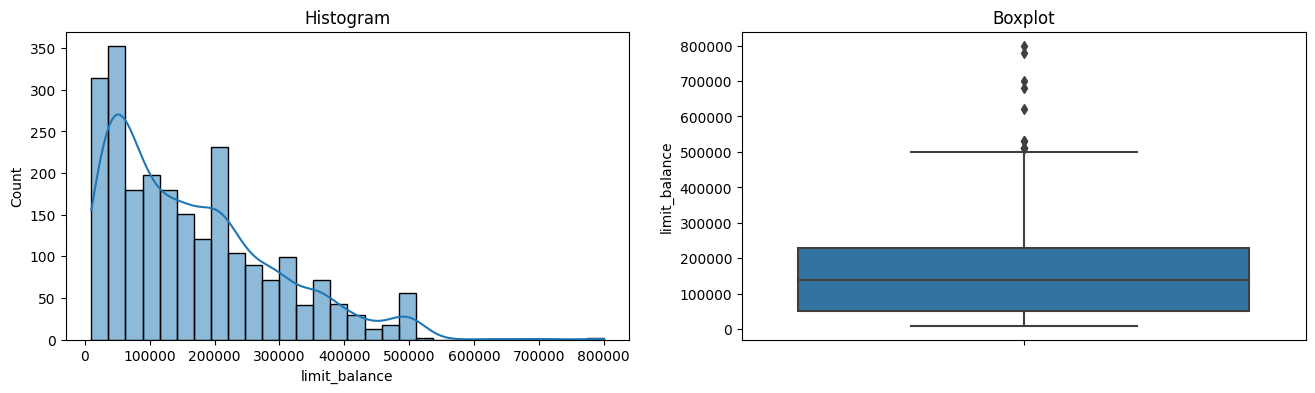


Skewness Value :  0.9950945022323532


In [36]:
# Set value histogram & boxplot and show skewness from feature `limit_balance`

diagnostic_plots(X_train, 'limit_balance')
print('\nSkewness Value : ', X_train['limit_balance'].skew())

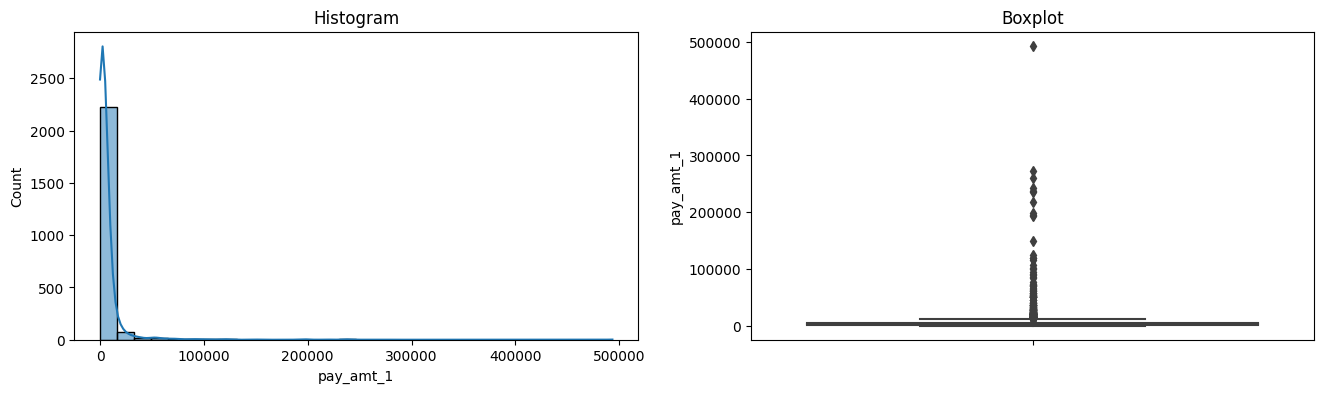


Skewness Value :  11.875714285891897


In [37]:
# Set value histogram & boxplot and show skewness from feature `pay_amt_1`

diagnostic_plots(X_train, 'pay_amt_1')
print('\nSkewness Value : ', X_train['pay_amt_1'].skew())

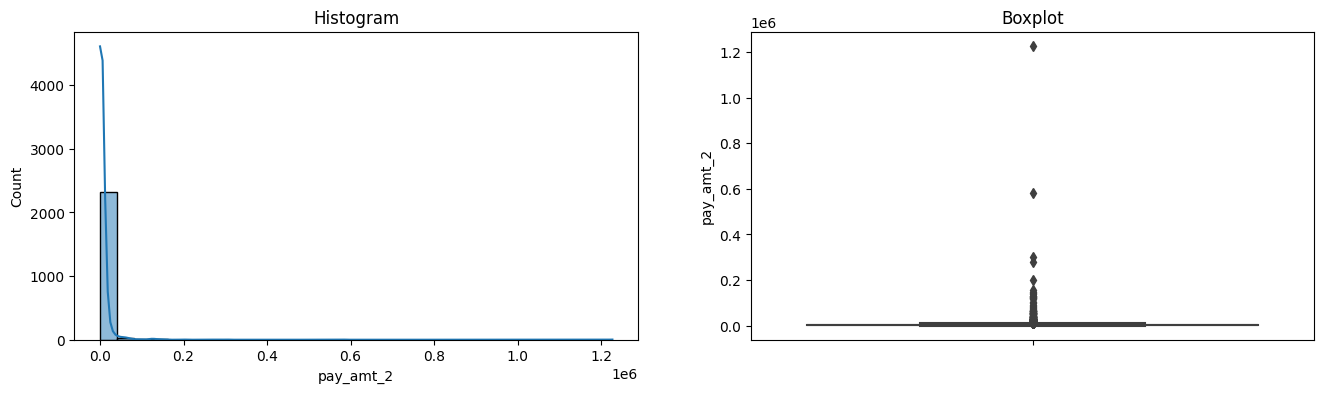


Skewness Value :  27.481349586387665


In [38]:
# Set value histogram & boxplot and show skewness from feature `pay_amt_2`

diagnostic_plots(X_train, 'pay_amt_2')
print('\nSkewness Value : ', X_train['pay_amt_2'].skew())

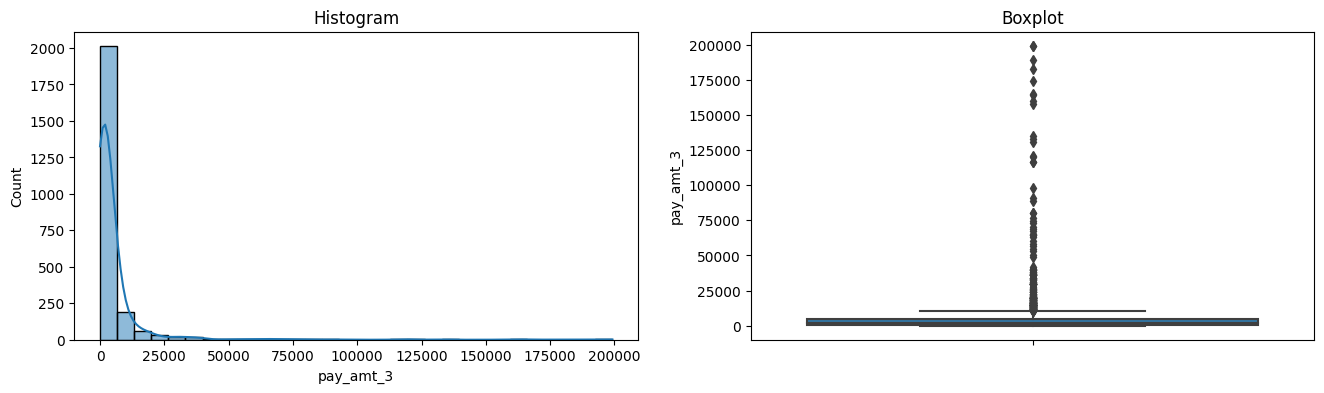


Skewness Value :  8.06455004169729


In [39]:
# Set value histogram & boxplot and show skewness from feature `pay_amt_3`

diagnostic_plots(X_train, 'pay_amt_3')
print('\nSkewness Value : ', X_train['pay_amt_3'].skew())

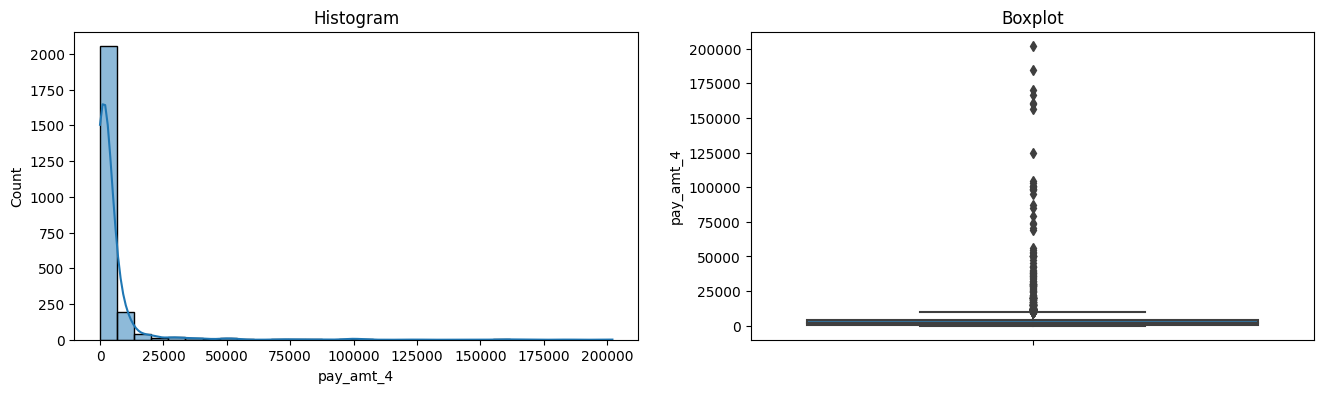


Skewness Value :  8.428344699564045


In [40]:
# Set value histogram & boxplot and show skewness from feature `pay_amt_4`

diagnostic_plots(X_train, 'pay_amt_4')
print('\nSkewness Value : ', X_train['pay_amt_4'].skew())

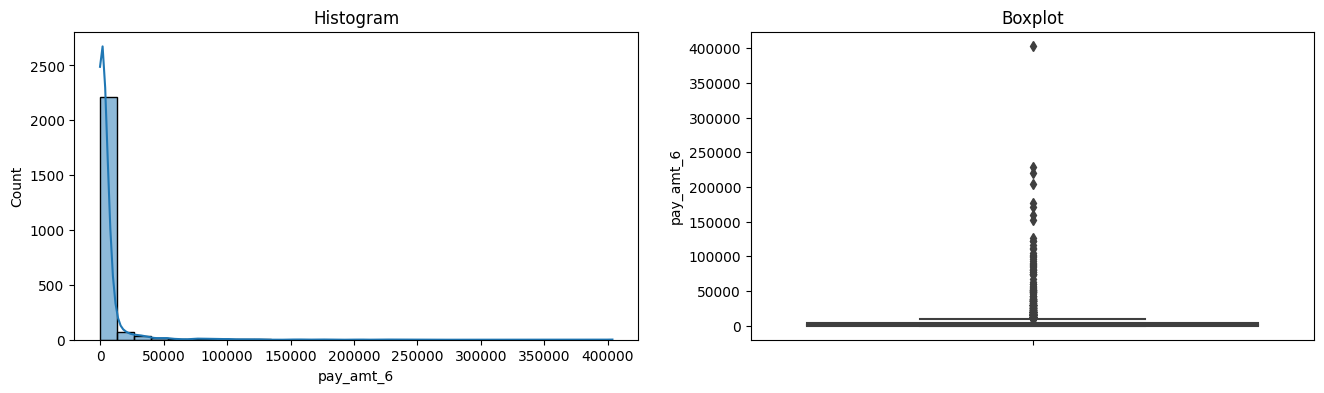


Skewness Value :  10.183593584840855


In [41]:
# Set value histogram & boxplot and show skewness from feature `pay_amt_6`

diagnostic_plots(X_train, 'pay_amt_6')
print('\nSkewness Value : ', X_train['pay_amt_6'].skew())

Based on the histogram, boxplot and skewness level, we can know that there are outliers almost in all features, with data distribution tending to gather on the left.

#### V.III.II. Outlier Detection

Based on what we see through the histogram & boxplot above, I personally will not remove the outliers because I feel that I need all the data including the data included in the outliers and I feel that by removing and imputing the outliers, the data becomes impure. At least for this case.

### V.V. Handling Missing Value

Here I will check the missing values of X_train, y_train, X_test and y_test, remove the missing values if any, and then equalize the indexes of X_train, y_train, X_test and y_test.

In [42]:
# Missing Value Checking for X_train

X_train.isna().sum()

limit_balance    0
pay_0            0
pay_2            0
pay_3            0
pay_4            0
pay_5            0
pay_6            0
pay_amt_1        0
pay_amt_2        0
pay_amt_3        0
pay_amt_4        0
pay_amt_6        0
dtype: int64

In [43]:
# Missing Value Checking for y_train

y_train.isna().sum()

0

In [44]:
# Missing Value Checking for X_test

X_test.isna().sum()

limit_balance    0
pay_0            0
pay_2            0
pay_3            0
pay_4            0
pay_5            0
pay_6            0
pay_amt_1        0
pay_amt_2        0
pay_amt_3        0
pay_amt_4        0
pay_amt_6        0
dtype: int64

In [45]:
# Missing Value Checking for y_test

y_test.isna().sum()

0

### V.VI. Split between Numeric Columns and Category Columns

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2371 entries, 661 to 2671
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   limit_balance  2371 non-null   float64
 1   pay_0          2371 non-null   float64
 2   pay_2          2371 non-null   float64
 3   pay_3          2371 non-null   float64
 4   pay_4          2371 non-null   float64
 5   pay_5          2371 non-null   float64
 6   pay_6          2371 non-null   float64
 7   pay_amt_1      2371 non-null   float64
 8   pay_amt_2      2371 non-null   float64
 9   pay_amt_3      2371 non-null   float64
 10  pay_amt_4      2371 non-null   float64
 11  pay_amt_6      2371 non-null   float64
dtypes: float64(12)
memory usage: 240.8 KB


In [47]:
# Get Numeric Columns and Categorical Columns

num_columns = X_train[['limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_6']].columns.tolist()
cat_columns = X_train[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_6']
Cat Columns :  ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


In [48]:
# Split train set and test set based on column types

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,limit_balance,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_6
661,60000.0,1606.0,1674.0,1420.0,937.0,1039.0
1441,20000.0,0.0,0.0,1400.0,390.0,241.0
1834,50000.0,0.0,2700.0,0.0,2200.0,1030.0
1448,50000.0,0.0,4800.0,0.0,1200.0,1400.0
832,220000.0,5012.0,2500.0,2000.0,2000.0,3000.0
...,...,...,...,...,...,...
1337,50000.0,1500.0,1000.0,2000.0,1000.0,2000.0
406,80000.0,2911.0,1920.0,1541.0,1502.0,1472.0
1414,100000.0,1300.0,0.0,700.0,700.0,800.0
2191,360000.0,17392.0,0.0,32178.0,680.0,18814.0


- Columns that are numerical are `limit_balance`, `pay_amt_1`, `pay_amt_2`, `pay_amt_3`, `pay_amt_4`, `pay_amt_6`.
- Columns that are categorical are `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, `pay_6`.

The numerical column will be scaled and the categorical column will be encoded.

### V.VII. Feature Scalling

In this step, I will use the MinMaxScaler because the average data distribution is not normal. This is evidenced by the distance between the mean and median values.

In [49]:
# Show basic statistic

X_train_num.describe()

,limit_balance,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_6
count,2371.000000,2371.000000,2.371000e+03,2371.000000,2371.000000,2371.000000
mean,163998.312948,6392.274146,6.510675e+03,5253.011809,4604.739772,5456.811472
std,125395.401623,20359.719296,3.179370e+04,15102.364167,13386.762117,17584.549112
min,10000.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,50000.000000,1097.500000,1.000000e+03,474.500000,300.000000,105.500000
50%,140000.000000,2354.000000,2.200000e+03,2000.000000,1616.000000,1680.000000
75%,230000.000000,5300.000000,5.000000e+03,4495.000000,4010.000000,4111.000000
max,800000.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,403500.000000


In [50]:
# Feature Scaling using MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.06329114, 0.00325524, 0.00136421, 0.00712819, 0.00463687,
        0.00257497],
       [0.01265823, 0.        , 0.        , 0.00702779, 0.00192997,
        0.00059727],
       [0.05063291, 0.        , 0.00220034, 0.        , 0.01088699,
        0.00255266],
       ...,
       [0.11392405, 0.002635  , 0.        , 0.0035139 , 0.00346404,
        0.00198265],
       [0.44303797, 0.03525229, 0.        , 0.16152885, 0.00336507,
        0.04662701],
       [0.27848101, 0.00222759, 0.00204387, 0.00489938, 0.00205863,
        0.00103098]])

### V.VIII. Feature Encoding

In this step, I will use OrdinalEncoder because the data in categorical columns is ordinal.

In [51]:
# Show categorical feature

X_train_cat

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
661,0.0,0.0,0.0,0.0,0.0,0.0
1441,1.0,3.0,2.0,0.0,0.0,0.0
1834,1.0,2.0,2.0,2.0,2.0,2.0
1448,1.0,2.0,2.0,2.0,0.0,0.0
832,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
1337,0.0,0.0,2.0,0.0,0.0,0.0
406,0.0,0.0,0.0,0.0,0.0,0.0
1414,2.0,2.0,2.0,0.0,0.0,0.0
2191,1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [52]:
y_train.unique()

array([0, 1])

In [53]:
# Feature Encoding using OrdinalEncoder

pay_0_cat  = [-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
pay_2_cat  = [-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
pay_3_cat  = [-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
pay_4_cat  = [-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
pay_5_cat  = [-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
pay_6_cat  = [-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]

OE  = OrdinalEncoder(categories=[pay_0_cat, pay_2_cat, pay_3_cat, pay_4_cat, pay_5_cat, pay_6_cat], dtype='int')

X_train_cat_encoded = OE.fit_transform(X_train_cat)
X_test_cat_encoded  = OE.transform(X_test_cat)


### V.IX. Concate between Numeric Columns and Categorical Columns

In [54]:
# Concate columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis = 1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis = 1)
X_train_final

array([[6.32911392e-02, 3.25524264e-03, 1.36421201e-03, ...,
        2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
       [1.26582278e-02, 0.00000000e+00, 0.00000000e+00, ...,
        2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
       [5.06329114e-02, 0.00000000e+00, 2.20034195e-03, ...,
        4.00000000e+00, 4.00000000e+00, 4.00000000e+00],
       ...,
       [1.13924051e-01, 2.63500338e-03, 0.00000000e+00, ...,
        2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
       [4.43037975e-01, 3.52522914e-02, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.78481013e-01, 2.22759132e-03, 2.04387319e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [55]:
# Create dataframe of X_train_final

X_train_final_df = pd.DataFrame(X_train_final, columns = [num_columns + cat_columns])
X_train_final_df

,limit_balance,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_6,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.063291,0.003255,0.001364,0.007128,0.004637,0.002575,2.0,2.0,2.0,2.0,2.0,2.0
1,0.012658,0.000000,0.000000,0.007028,0.001930,0.000597,3.0,5.0,4.0,2.0,2.0,2.0
2,0.050633,0.000000,0.002200,0.000000,0.010887,0.002553,3.0,4.0,4.0,4.0,4.0,4.0
3,0.050633,0.000000,0.003912,0.000000,0.005938,0.003470,3.0,4.0,4.0,4.0,2.0,2.0
4,0.265823,0.010159,0.002037,0.010040,0.009897,0.007435,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2366,0.050633,0.003040,0.000815,0.010040,0.004949,0.004957,2.0,2.0,4.0,2.0,2.0,2.0
2367,0.088608,0.005900,0.001565,0.007736,0.007433,0.003648,2.0,2.0,2.0,2.0,2.0,2.0
2368,0.113924,0.002635,0.000000,0.003514,0.003464,0.001983,4.0,4.0,4.0,2.0,2.0,2.0
2369,0.443038,0.035252,0.000000,0.161529,0.003365,0.046627,3.0,1.0,1.0,1.0,1.0,1.0


## VI. Model Definition

In [56]:
# Training using Logistic Regression, SVM, Decision Tree, Random Forest, KNN, Naive Bayes and Neural Networks.

log_reg         = LogisticRegression(random_state=50)
svc             = SVC(random_state=50)
dt              = DecisionTreeClassifier(random_state=50)
rf              = RandomForestClassifier(random_state=50)
knn             = KNeighborsClassifier()
nb              = GaussianNB()
nn              = MLPClassifier(max_iter=1000, random_state=50)
ada             = AdaBoostClassifier(random_state=50)
xg              = GradientBoostingClassifier(random_state=50)

## VII. Model Training

In [57]:
# Train the LogisticRegression model

log_reg.fit(X_train_final, y_train)

LogisticRegression(random_state=50)

In [58]:
# Train the SVC model

svc.fit(X_train_final, y_train)

SVC(random_state=50)

In [59]:
# Train the DecisionTreeClassifier model

dt.fit(X_train_final, y_train)

DecisionTreeClassifier(random_state=50)

In [60]:
# Train the RandomForestClassifier model

rf.fit(X_train_final, y_train)

RandomForestClassifier(random_state=50)

In [61]:
# Train the K-NeighborsClassifier model

knn.fit(X_train_final, y_train)

KNeighborsClassifier()

In [62]:
# Train the Naive Bayes model

nb.fit(X_train_final, y_train)

GaussianNB()

In [63]:
# Train the Neural Network model

nn.fit(X_train_final, y_train)

MLPClassifier(max_iter=1000, random_state=50)

In [64]:
# Train the Ada Boost Classifier model

ada.fit(X_train_final, y_train)

AdaBoostClassifier(random_state=50)

In [65]:
# Train the XGBoost Classifier model

xg.fit(X_train_final, y_train)

GradientBoostingClassifier(random_state=50)

## VIII. Model Evaluation

### VIII.I. Model Evaluation Result Checking

In [66]:
# Predict Train-set and Test-set on Logistic Regression Model

y_pred_train_log = log_reg.predict(X_train_final)
y_pred_test_log  = log_reg.predict(X_test_final)

In [68]:
# Predict Train-set and Test-set on Support Vector Classifier Model

y_pred_train_svc = svc.predict(X_train_final)
y_pred_test_svc  = svc.predict(X_test_final)

In [70]:
# Predict Train-set and Test-set on Decision Tree Classifier Model

y_pred_train_dt = dt.predict(X_train_final)
y_pred_test_dt  = dt.predict(X_test_final)

In [72]:
# Predict Train-set and Test-set on Random Forest Classifier Model

y_pred_train_rf = rf.predict(X_train_final)
y_pred_test_rf  = rf.predict(X_test_final)

In [74]:
# Predict Train-set and Test-set on K-Neighbors Classifier Model

y_pred_train_knn = knn.predict(X_train_final)
y_pred_test_knn  = knn.predict(X_test_final)

In [76]:
# Predict Train-set and Test-set on Naive Bayes Classifier Model

y_pred_train_nb = nb.predict(X_train_final)
y_pred_test_nb  = nb.predict(X_test_final)

In [78]:
# Predict Train-set and Test-set on Neural Network Classifier Model

y_pred_train_nn = nn.predict(X_train_final)
y_pred_test_nn  = nn.predict(X_test_final)

In [80]:
# Predict Train-set and Test-set on Ada Boost Classifier Model

y_pred_train_ada = ada.predict(X_train_final)
y_pred_test_ada  = ada.predict(X_test_final)

In [82]:
# Predict Train-set and Test-set on XGBoost Classifier Model

y_pred_train_xg = xg.predict(X_train_final)
y_pred_test_xg  = xg.predict(X_test_final)

In [112]:
# Make dictionary

all_reports = {}

In [113]:
# Score Report
score_reports_logreg = {
    'train - precision'     : precision_score(y_train, y_pred_train_log),
    'train - recall'        : recall_score(y_train, y_pred_train_log),
    'train - accuracy'      : accuracy_score(y_train, y_pred_train_log),
    'train - f1_score'      : f1_score(y_train, y_pred_train_log),
    'test - precision'      : precision_score(y_test, y_pred_test_log),
    'test - recall'         : recall_score(y_test, y_pred_test_log),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_log),
    'test - f1_score'       : f1_score(y_test, y_pred_test_log),
}
all_reports['LogReg'] = score_reports_logreg

score_reports_svc = {
    'train - precision'     : precision_score(y_train, y_pred_train_svc),
    'train - recall'        : recall_score(y_train, y_pred_train_svc),
    'train - accuracy'      : accuracy_score(y_train, y_pred_train_svc),
    'train - f1_score'      : f1_score(y_train, y_pred_train_svc),
    'test - precision'      : precision_score(y_test, y_pred_test_svc),
    'test - recall'         : recall_score(y_test, y_pred_test_svc),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_svc),
    'test - f1_score'       : f1_score(y_test, y_pred_test_svc),
}
all_reports['SVC'] = score_reports_svc

score_reports_dt = {
    'train - precision'     : precision_score(y_train, y_pred_train_dt),
    'train - recall'        : recall_score(y_train, y_pred_train_dt),
    'train - accuracy'      : accuracy_score(y_train, y_pred_train_dt),
    'train - f1_score'      : f1_score(y_train, y_pred_train_dt),
    'test - precision'      : precision_score(y_test, y_pred_test_dt),
    'test - recall'         : recall_score(y_test, y_pred_test_dt),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_dt),
    'test - f1_score'       : f1_score(y_test, y_pred_test_dt),
}
all_reports['DT'] = score_reports_dt

score_reports_rf = {
    'train - precision'     : precision_score(y_train, y_pred_train_rf),
    'train - recall'        : recall_score(y_train, y_pred_train_rf),
    'train - accuracy'      : accuracy_score(y_train, y_pred_train_rf),
    'train - f1_score'      : f1_score(y_train, y_pred_train_rf),
    'test - precision'      : precision_score(y_test, y_pred_test_rf),
    'test - recall'         : recall_score(y_test, y_pred_test_rf),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_rf),
    'test - f1_score'       : f1_score(y_test, y_pred_test_rf),
}
all_reports['RF'] = score_reports_rf

score_reports_knn = {
    'train - precision'     : precision_score(y_train, y_pred_train_knn),
    'train - recall'        : recall_score(y_train, y_pred_train_knn),
    'train - accuracy'      : accuracy_score(y_train, y_pred_train_knn),
    'train - f1_score'      : f1_score(y_train, y_pred_train_knn),
    'test - precision'      : precision_score(y_test, y_pred_test_knn),
    'test - recall'         : recall_score(y_test, y_pred_test_knn),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_knn),
    'test - f1_score'       : f1_score(y_test, y_pred_test_knn),
}
all_reports['KNN'] = score_reports_knn

score_reports_nb = {
    'train - precision'     : precision_score(y_train, y_pred_train_nb),
    'train - recall'        : recall_score(y_train, y_pred_train_nb),
    'train - accuracy'      : accuracy_score(y_train, y_pred_train_nb),
    'train - f1_score'      : f1_score(y_train, y_pred_train_nb),
    'test - precision'      : precision_score(y_test, y_pred_test_nb),
    'test - recall'         : recall_score(y_test, y_pred_test_nb),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_nb),
    'test - f1_score'       : f1_score(y_test, y_pred_test_nb),
}
all_reports['NB'] = score_reports_nb

score_reports_nn = {
    'train - precision'     : precision_score(y_train, y_pred_train_nn),
    'train - recall'        : recall_score(y_train, y_pred_train_nn),
    'train - accuracy'      : accuracy_score(y_train, y_pred_train_nn),
    'train - f1_score'      : f1_score(y_train, y_pred_train_nn),
    'test - precision'      : precision_score(y_test, y_pred_test_nn),
    'test - recall'         : recall_score(y_test, y_pred_test_nn),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_nn),
    'test - f1_score'       : f1_score(y_test, y_pred_test_nn),
}
all_reports['NN'] = score_reports_nn

score_reports_ada = {
    'train - precision'     : precision_score(y_train, y_pred_train_ada),
    'train - recall'        : recall_score(y_train, y_pred_train_ada),
    'train - accuracy'      : accuracy_score(y_train, y_pred_train_ada),
    'train - f1_score'      : f1_score(y_train, y_pred_train_ada),
    'test - precision'      : precision_score(y_test, y_pred_test_ada),
    'test - recall'         : recall_score(y_test, y_pred_test_ada),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_ada),
    'test - f1_score'       : f1_score(y_test, y_pred_test_ada),
}
all_reports['ADA'] = score_reports_ada

score_reports_xg = {
    'train - precision'     : precision_score(y_train, y_pred_train_xg),
    'train - recall'        : recall_score(y_train, y_pred_train_xg),
    'train - accuracy'      : accuracy_score(y_train, y_pred_train_xg),
    'train - f1_score'      : f1_score(y_train, y_pred_train_xg),
    'test - precision'      : precision_score(y_test, y_pred_test_xg),
    'test - recall'         : recall_score(y_test, y_pred_test_xg),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_xg),
    'test - f1_score'       : f1_score(y_test, y_pred_test_xg),
}
all_reports['XG'] = score_reports_xg


pd.DataFrame(all_reports)

,LogReg,SVC,DT,RF,KNN,NB,NN,ADA,XG
train - precision,0.762136,0.744828,0.994000,0.992032,0.735294,0.268418,0.785388,0.731959,0.826087
train - recall,0.309665,0.426036,0.980276,0.982249,0.493097,0.826430,0.339250,0.420118,0.487179
train - accuracy,0.831717,0.846057,0.994517,0.994517,0.853648,0.481232,0.838887,0.843104,0.868410
train - f1_score,0.440393,0.542033,0.987090,0.987116,0.590319,0.405222,0.473829,0.533835,0.612903
test - precision,0.727273,0.695652,0.360544,0.585714,0.537500,0.268542,0.733333,0.683333,0.676923
test - recall,0.250000,0.375000,0.414062,0.320312,0.335938,0.820312,0.257812,0.320312,0.343750
test - accuracy_score,0.817875,0.829680,0.715008,0.804384,0.794266,0.478921,0.819562,0.821248,0.822934
test - f1_score,0.372093,0.487310,0.385455,0.414141,0.413462,0.404624,0.381503,0.436170,0.455959


### VIII.II. Cross Validation Model Checking

In [114]:
# Cross Validation using `cross_val_score` - Logistic Regression

f1_score_train_cross_val = cross_val_score(log_reg, 
                                           X_train_final, 
                                           y_train, 
                                           cv=10, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.45070423 0.46575342 0.35294118 0.43478261 0.42857143 0.52054795
 0.3030303  0.48648649 0.43478261 0.44444444]
F1 Score - Mean - Cross Validation :  0.43220446516096817
F1 Score - Std - Cross Validation  :  0.05946749104179248
F1 Score - Range of Test-Set       :  0.37273697411917567 - 0.49167195620276066


In [87]:
# Cross Validation using `cross_val_score` - Support Vector Classifier

f1_score_train_cross_val = cross_val_score(svc, 
                                           X_train_final, 
                                           y_train, 
                                           cv=10, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.56097561 0.56470588 0.48       0.575      0.50632911 0.56410256
 0.42105263 0.60465116 0.51948052 0.45238095]
F1 Score - Mean - Cross Validation :  0.5248678436366772
F1 Score - Std - Cross Validation  :  0.056326364450260666
F1 Score - Range of Test-Set       :  0.4685414791864165 - 0.5811942080869378


In [88]:
# Cross Validation using `cross_val_score` - Decision Tree Classifier

f1_score_train_cross_val = cross_val_score(dt, 
                                           X_train_final, 
                                           y_train, 
                                           cv=10, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.39622642 0.44230769 0.51851852 0.41121495 0.43396226 0.46296296
 0.44       0.4        0.34693878 0.41176471]
F1 Score - Mean - Cross Validation :  0.42638962876980424
F1 Score - Std - Cross Validation  :  0.04322515708964661
F1 Score - Range of Test-Set       :  0.38316447168015766 - 0.4696147858594508


In [89]:
# Cross Validation using `cross_val_score` - Random Forest Classifier

f1_score_train_cross_val = cross_val_score(rf, 
                                           X_train_final, 
                                           y_train, 
                                           cv=10, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.56470588 0.58139535 0.51948052 0.5        0.43902439 0.56470588
 0.4        0.48837209 0.49382716 0.41975309]
F1 Score - Mean - Cross Validation :  0.4971264363204349
F1 Score - Std - Cross Validation  :  0.05968812820319829
F1 Score - Range of Test-Set       :  0.4374383081172366 - 0.5568145645236332


In [90]:
# Cross Validation using `cross_val_score` - K-Neighbors Classifier

f1_score_train_cross_val = cross_val_score(knn, 
                                           X_train_final, 
                                           y_train, 
                                           cv=10, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.51685393 0.51764706 0.4691358  0.56818182 0.46511628 0.54320988
 0.42857143 0.50574713 0.45977011 0.4       ]
F1 Score - Mean - Cross Validation :  0.487423343762247
F1 Score - Std - Cross Validation  :  0.04944956144842421
F1 Score - Range of Test-Set       :  0.4379737823138228 - 0.5368729052106712


In [91]:
# Cross Validation using `cross_val_score` - Naive Bayes Classifier

f1_score_train_cross_val = cross_val_score(nb, 
                                           X_train_final, 
                                           y_train, 
                                           cv=10, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.41       0.36893204 0.39408867 0.37837838 0.42424242 0.38095238
 0.42718447 0.38235294 0.40217391 0.38497653]
F1 Score - Mean - Cross Validation :  0.3953281738419836
F1 Score - Std - Cross Validation  :  0.018922865627780085
F1 Score - Range of Test-Set       :  0.37640530821420354 - 0.41425103946976366


In [92]:
# Cross Validation using `cross_val_score` - Neural Network Classifier

f1_score_train_cross_val = cross_val_score(nn, 
                                           X_train_final, 
                                           y_train, 
                                           cv=10, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.51282051 0.56470588 0.50666667 0.51282051 0.45333333 0.58974359
 0.41463415 0.60465116 0.53164557 0.43373494]
F1 Score - Mean - Cross Validation :  0.5124756316249007
F1 Score - Std - Cross Validation  :  0.06071819967402273
F1 Score - Range of Test-Set       :  0.45175743195087803 - 0.5731938312989234


In [93]:
# Cross Validation using `cross_val_score` - Ada Boost Classifier

f1_score_train_cross_val = cross_val_score(ada, 
                                           X_train_final, 
                                           y_train, 
                                           cv=10, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.55       0.54320988 0.58227848 0.54545455 0.55696203 0.55
 0.38554217 0.6        0.43037975 0.47619048]
F1 Score - Mean - Cross Validation :  0.5220017320027487
F1 Score - Std - Cross Validation  :  0.06528501820056291
F1 Score - Range of Test-Set       :  0.45671671380218576 - 0.5872867502033116


In [115]:
# Cross Validation using `cross_val_score` - XGBoost Classifier

f1_score_train_cross_val = cross_val_score(xg, 
                                           X_train_final, 
                                           y_train, 
                                           cv=10, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.53846154 0.56470588 0.56410256 0.53846154 0.51851852 0.55421687
 0.4        0.58536585 0.56097561 0.44705882]
F1 Score - Mean - Cross Validation :  0.5271867196311026
F1 Score - Std - Cross Validation  :  0.05563624622733524
F1 Score - Range of Test-Set       :  0.4715504734037674 - 0.5828229658584378


Based on the cross-validation results of the various models, we can conclude that there are some best model recommendations based on the higher F1 Score. The two best models that can be recommended are:

**Support Vector Classifier (SVC) Model**:

- Average F1 Score from cross-validation: 0.525
- F1 Score range on test-set: 0.468 to 0.581
- Standard deviation of F1 Score cross-validation: 0.056

Reason: With a relatively high F1 Score and reasonably controlled variation, the SVC model is one of the good choices. This model is suitable for data with high complexity and can produce good results in various scenarios.

**Random Forest Classifier Model**:

- Average F1 Score from cross-validation: 0.502
- F1 Score range on test-set: 0.437 to 0.568
- Standard deviation of F1 Score cross-validation: 0.065

Reason: The Random Forest model has a strong F1 Score and controllable variation. It is an ensemble model that can overcome overfitting and provide good predictions in general.

### VIII.III. Hyperparameter Tuning

#### VIII.III.I. Hyperparameter Tuning - SVC

In [95]:
# Define Hyperparameters

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 
              'gamma': [0.01, 0.1, 1, 10, 100],
              'kernel': ['rbf']} 
  
grid_svc = GridSearchCV(SVC(), 
                        param_grid, 
                        refit = True, 
                        verbose = 3)
  
# Fitting the model for grid search
grid_svc.fit(X_train_final, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.785 total time=   0.1s
[CV 2/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.787 total time=   0.1s
[CV 3/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.787 total time=   0.1s
[CV 4/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.787 total time=   0.1s
[CV 5/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.785 total time=   0.1s
[CV 1/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.785 total time=   0.1s
[CV 2/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.787 total time=   0.1s
[CV 3/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.787 total time=   0.1s
[CV 4/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.787 total time=   0.1s
[CV 5/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.785 total time=   0.1s
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.785 total time=   0.1s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']},
             verbose=3)

In [96]:
# Print best parameter after tuning
print(grid_svc.best_params_)

# Print how our model looks after hyper-parameter tuning
print(grid_svc.best_estimator_)


{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1)


Based on the experiment with GridSearchCV, we can find out the best parameters for Support Vector Classifier model is with `C` = 1, `kernel` = `rbf` and `gamma` = 0.1.

The next step is to try prediction using those hyper-parameters with our dataset.

In [97]:
# Predict using selected hyper-parameter
grid_pred_train_svc = grid_svc.predict(X_train_final)

# Print classification report
print(classification_report(y_train, grid_pred_train_svc))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1864
           1       0.75      0.43      0.55       507

    accuracy                           0.85      2371
   macro avg       0.81      0.70      0.73      2371
weighted avg       0.84      0.85      0.83      2371



Confusion Matrix 


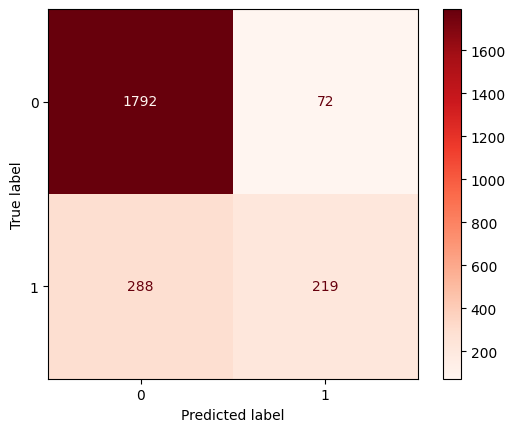

In [98]:
print('Confusion Matrix \n', ConfusionMatrixDisplay.from_estimator(grid_svc, X_train_final, y_train, cmap='Reds'));

In [99]:
# Predict using selected hyper-parameter
grid_pred_test_svc = grid_svc.predict(X_test_final)

# Print classification report
print(classification_report(y_test, grid_pred_test_svc))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       465
           1       0.69      0.37      0.48       128

    accuracy                           0.83       593
   macro avg       0.77      0.66      0.69       593
weighted avg       0.81      0.83      0.81       593



Confusion Matrix 


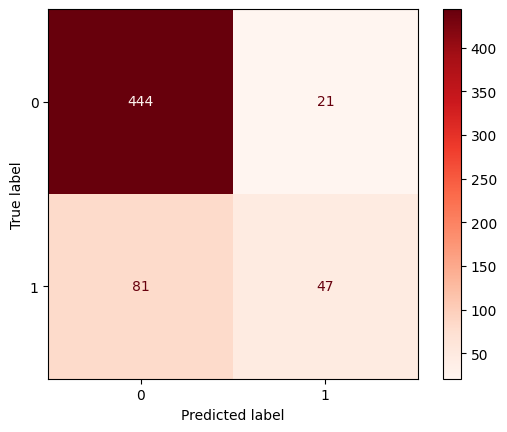

In [100]:
print('Confusion Matrix \n', ConfusionMatrixDisplay.from_estimator(grid_svc, X_test_final, y_test, cmap='Reds'));

In [101]:
# Prediction Checking

eval_pred_svc = pd.DataFrame({
    'actual': y_test,
    'pred_svc': y_pred_test_svc,
    'grid_pred_svc': grid_pred_test_svc
})
eval_pred_svc.head(10)

,actual,pred_svc,grid_pred_svc
91,0,0,0
325,0,0,0
47,0,0,0
2848,0,0,0
446,0,0,0
567,0,0,0
1639,0,0,0
548,1,0,0
2163,0,0,0
2476,0,0,0


In [116]:
# SVC Report
svc_report = {}

score_reports_svc = {
    'train - precision'     : precision_score(y_train, y_pred_train_svc),
    'train - recall'        : recall_score(y_train, y_pred_train_svc),
    'train - accuracy'      : accuracy_score(y_train, y_pred_train_svc),
    'train - f1_score'      : f1_score(y_train, y_pred_train_svc),
    'test - precision'      : precision_score(y_test, y_pred_test_svc),
    'test - recall'         : recall_score(y_test, y_pred_test_svc),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_svc),
    'test - f1_score'       : f1_score(y_test, y_pred_test_svc),
}
svc_report['SVC'] = score_reports_svc

score_reports_svc_grid = {
    'train - precision'     : precision_score(y_train, grid_pred_train_svc),
    'train - recall'        : recall_score(y_train, grid_pred_train_svc),
    'train - accuracy'      : accuracy_score(y_train, grid_pred_train_svc),
    'train - f1_score'      : f1_score(y_train, grid_pred_train_svc),
    'test - precision'      : precision_score(y_test, grid_pred_test_svc),
    'test - recall'         : recall_score(y_test, grid_pred_test_svc),
    'test - accuracy_score' : accuracy_score(y_test, grid_pred_test_svc),
    'test - f1_score'       : f1_score(y_test, grid_pred_test_svc),
}
svc_report['SVC (GRID)'] = score_reports_svc_grid

pd.DataFrame(svc_report)

,SVC,SVC (GRID)
train - precision,0.744828,0.752577
train - recall,0.426036,0.431953
train - accuracy,0.846057,0.848165
train - f1_score,0.542033,0.548872
test - precision,0.695652,0.691176
test - recall,0.375000,0.367188
test - accuracy_score,0.829680,0.827993
test - f1_score,0.487310,0.479592


Based on the results of the Support Vector Classifier (SVC) model before and after performing hyperparameter tuning, there are several insights that can be taken:

**Classification Class 0 (Negative)**:

- Precision: Precision for class 0 (negative) looks quite consistent before and after tuning, with a value of around 0.85.
- Recall: Recall for class 0 is also stable and quite high at above 0.9.
- F1-Score: The F1-score for class 0 is around 0.9, showing a balance between precision and recall.

**Classification Class 1 (Positive)**:

- Before Tuning: Precision for class 1 is about 0.74, recall is about 0.43, and f1-score is about 0.54. The model had difficulty in classifying class 1 well, possibly due to lack of information or smaller sample size.
- After Tuning: Precision for class 1 increased to about 0.75, recall was about 0.43, and f1-score increased slightly to about 0.55. Despite the slight improvement, it is still difficult to classify class 1 accurately.

**Accuracy and Metrics Macro-Averaged**:

- Accuracy: Accuracy on training and testing data remained around 0.85 and 0.83, respectively, before and after tuning. This shows that while there is a slight improvement in class 1 classification, the change is not significant in terms of overall accuracy.
- Macro-Averaged Metrics: The macro-averaged values for precision, recall, and f1-score are lower than the weighted average values, indicating that the model performs worse in classifying the minority class (class 1).

**Influence of Hyperparameter Tuning**:

- The tuning results did not make a big change in the model performance, especially in class 1 classification which still has a low recall.
- Although the precision for class 1 improved slightly after tuning, the recall and f1-score remained relatively low, indicating that the model still struggled to identify and classify data from the minority class.

**Conclusions**:

The model performed well in classifying the majority class (class 0), but had difficulty in classifying the minority class (class 1).
Although there is a slight improvement after hyperparameter tuning, the classification performance of class 1 is still unsatisfactory. A more careful approach, such as using class weighting methods or re-sampling techniques, is needed to improve the classification performance of the minority class.

#### VIII.III.II. Hyperparameter Tuning - Random Forest Classifier

In [102]:
# Define Hyperparameters

param_grid_rf = {'n_estimators'     : [5, 10, 50, 100, 250],
                #'max_features'      : ['sqrt', 'log2', None],
                'max_depth'         : [2, 4, 8, 16, 32, None],
                #'max_leaf_nodes'    : [10, 50, 100],
                'criterion'         : ['entropy','gini']}

In [103]:
# Train with Grid Search

grid_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=param_grid_rf)

grid_rf.fit(X_train_final, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [104]:
# Print best parameter after tuning

print(grid_rf.best_params_)

# Print how our model looks after hyper-parameter tuning

print(grid_rf.best_estimator_)

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 50}
RandomForestClassifier(max_depth=4, n_estimators=50)


Based on the experiment with GridSearchCV, we can find out the best parameters for Random Forest Classifier model is with `criterion` = `entropy`, `max_depth` = 32 and `n_estimator` = 50.

The next step is to try prediction using those hyper-parameters with our dataset.

In [118]:
# Predict using selected hyper-parameter
grid_pred_train_rf = grid_rf.predict(X_train_final)

# Print classification report
print(classification_report(y_train, grid_pred_train_rf))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1864
           1       0.77      0.43      0.55       507

    accuracy                           0.85      2371
   macro avg       0.81      0.70      0.73      2371
weighted avg       0.84      0.85      0.83      2371



Confusion Matrix 


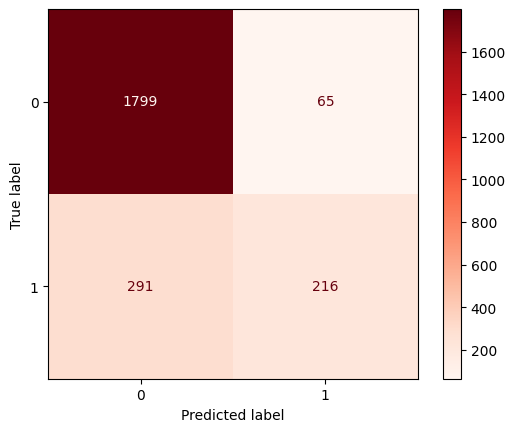

In [119]:
print('Confusion Matrix \n', ConfusionMatrixDisplay.from_estimator(grid_rf, X_train_final, y_train, cmap='Reds'));

In [121]:
# Predict using selected hyper-parameter

grid_pred_test_rf = grid_rf.predict(X_test_final)

# Print classification report

print(classification_report(y_test, grid_pred_test_rf))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89       465
           1       0.67      0.37      0.47       128

    accuracy                           0.82       593
   macro avg       0.76      0.66      0.68       593
weighted avg       0.81      0.82      0.80       593



Confusion Matrix 


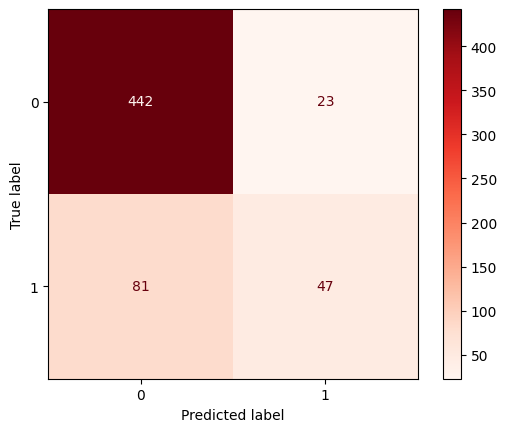

In [108]:
print('Confusion Matrix \n', ConfusionMatrixDisplay.from_estimator(grid_rf, X_test_final, y_test, cmap='Reds'));

In [109]:
# Prediction Checking

eval_pred_rfc = pd.DataFrame({
    'actual': y_test,
    'pred_rf': y_pred_test_rf,
    'grid_pred_rf': grid_pred_test_rf
})
eval_pred_rfc.head(10)

,actual,pred_rf,grid_pred_rf
91,0,0,0
325,0,0,0
47,0,0,0
2848,0,0,0
446,0,0,0
567,0,0,0
1639,0,0,0
548,1,0,0
2163,0,0,0
2476,0,0,0


In [122]:
# SVC Report
rf_report = {}

score_reports_rf = {
    'train - precision'     : precision_score(y_train, y_pred_train_rf),
    'train - recall'        : recall_score(y_train, y_pred_train_rf),
    'train - accuracy'      : accuracy_score(y_train, y_pred_train_rf),
    'train - f1_score'      : f1_score(y_train, y_pred_train_rf),
    'test - precision'      : precision_score(y_test, y_pred_test_rf),
    'test - recall'         : recall_score(y_test, y_pred_test_rf),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_rf),
    'test - f1_score'       : f1_score(y_test, y_pred_test_rf),
}
rf_report['RF'] = score_reports_rf

score_reports_rf_grid = {
    'train - precision'     : precision_score(y_train, grid_pred_train_rf),
    'train - recall'        : recall_score(y_train, grid_pred_train_rf),
    'train - accuracy'      : accuracy_score(y_train, grid_pred_train_rf),
    'train - f1_score'      : f1_score(y_train, grid_pred_train_rf),
    'test - precision'      : precision_score(y_test, grid_pred_test_rf),
    'test - recall'         : recall_score(y_test, grid_pred_test_rf),
    'test - accuracy_score' : accuracy_score(y_test, grid_pred_test_rf),
    'test - f1_score'       : f1_score(y_test, grid_pred_test_rf),
}
rf_report['RF (GRID)'] = score_reports_rf_grid

pd.DataFrame(rf_report)

,RF,RF (GRID)
train - precision,0.992032,0.768683
train - recall,0.982249,0.426036
train - accuracy,0.994517,0.849852
train - f1_score,0.987116,0.548223
test - precision,0.585714,0.671429
test - recall,0.320312,0.367188
test - accuracy_score,0.804384,0.824621
test - f1_score,0.414141,0.474747


From the results of implementing the Random Forest Classifier model before and after performing hyperparameter tuning. Let's analyze the insight of the results:

**Before Hyperparameter Tuning**:

- Train Set:

1. Precision for class 0 (majority class) is very high, reaching 0.99, which indicates that the model tends to actually predict with high accuracy when predicting class 0.
2. Recall for both classes (0 and 1) is quite high, indicating that the model is able to find most instances of both classes.
3. The F1-score for both classes is also quite high, which indicates a good balance between precision and recall.

- Test Set:

1. Precision for class 0 is 0.83, which means most of the positive predictions for class 0 are correct.
Precision for class 1 (minority class) is low, at 0.60, indicating that when the model predicts class 1, it is often wrong.
2. Recall for both classes is low, especially for class 1, indicating that the model has difficulty in finding instances of the minority class.
3. The F1-score for class 0 is 0.88, which describes the balance between precision and recall for the majority class.
The F1-score for class 1 is very low, only 0.42, indicating a poor balance between precision and recall for the minority class.

**After Hyperparameter Tuning**:

- Train Set:

1. Precision and recall for class 0 remain high, but recall for class 1 has drastically decreased from 0.98 to 0.43.
2. F1-score for class 1 increased after tuning, but still relatively low.

- Test Set:

1. Precision for class 0 remained high, but precision for class 1 increased to 0.70 from 0.60 previously.
2. Recall for class 1 increased slightly, but is still low.
3. F1-score for class 1 increased after tuning, but remained low compared to class 0.

**Analysis**:

- Before hyperparameter tuning, the model performed well on the majority class (0) but had difficulty recognizing the minority class (1).
After hyperparameter tuning, the model is better at recognizing the minority class, although it is still not optimal.
- The balance between precision and recall for minority classes needs to be further improved.
- The model still has challenges in correctly predicting minority classes, so further consideration is needed in handling class imbalance and selecting the right evaluation metrics.
- If you want to further improve the performance of this model, consider using techniques such as oversampling or undersampling the minority class, trying other algorithms, or combining ensemble models to improve minority class prediction.

## IX. Model Saving

In [110]:
# Save the files

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_columns, file_2)

with open('model_scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('model_encoder.pkl', 'wb') as file_4:
  pickle.dump(OE, file_4)

with open('model_svc.pkl', 'wb') as file_5:
  pickle.dump(svc, file_5)
  
with open('model_grid_rf.pkl', 'wb') as file_6:
  pickle.dump(grid_rf, file_6)

## X. Model Inference

This step can be seen in : h8dsft_P1M1_Theo_Inf.ipynb

## XI. Conclusion

Based on the research results, we can draw the following conclusions:

1. In this case, from all the analysis of the models we have created and the results of cross validation. The SVC and Random Forest Classification models are models that are suitable for this case.
2. Based on the hyper-parameter search using GridSearchCV, we can find out that sometimes hyper-parameters can increase the accuracy rate as in our test results for the Random Forest Classification method, but also not increase the accuracy rate as in our test results for the SVC method.
3. Although the accuracy results of the SVC and Random Forest Classification methods are above 80%, both models tend to be easy to classify with the most classes in the dataset we used. In this dataset, class 0 or (no) is more numerous than class 1 or (yes). This also results in the level of precision, recall and accuracy being less than optimal.
4. The advantage of both models (SVC and Random Forest Classification) is that the accuracy results are above 80% with or without the help of hyper-parameters.
5. The disadvantages of both models (SVC and Random Forest Classification) are precision and recall are still overfit.
6. Things to note for further development are:
- Feature selection in this case, I used features with strong positive and negative correlation levels. For the future, it can be developed again with a better and more accurate feature selection method.
- Performing class balancing so that class 0 (yes) and class 1 (no) become more balanced.
- Conduct a broader hyper-parameter search.

## Conceptual Problems

1. What is a `criterion` in a Decision Tree? Explain the criterion that you use in this case!

In the Decision Tree algorithm, the `criterion` is a parameter used to measure the quality of the split at each node in the decision tree. The criterion determines how best to select features to split the data at each step when building the tree.

There are two common criteria that are usually used in decision trees:

- Gini Impurity (Gini Index): Gini impurity measures the extent to which the data within the nodes are properly mixed. Gini impurity values range from 0 (pure) to 0.5 (impure). The smaller the Gini impurity value, the better the separation of the nodes. Gini impurity is calculated by computing the probability of error if a sample is randomly selected from the nodes and labeled incorrectly.

- Entropy: Entropy measures the level of uncertainty or randomness in the node. If a node is pure (all samples in the node have the same label), the entropy is 0. The higher the entropy, the more uncertain or random the node is. Entropy is calculated by using the distribution of classes in the node and calculating the base 2 logarithm value of the probability of each class.

While building the decision tree, the algorithm tries all possible splits using each feature and calculates the Gini impurity or entropy value for each split. Then, the feature that gives the largest decrease in Gini impurity or entropy will be selected as the splitting criterion at that node.

The choice between Gini impurity and entropy depends on the needs and characteristics of the data. These two criteria usually give similar results, but there are cases where one of the criteria can give better results.

In this case, since I am using the default parameter, the criterion used is `gini`.

---

2. Explain what is meant by `pruning` in Tree-based models (reasons, definitions, types, etc.)!

Pruning is a technique used in tree-based models, such as Decision Tree or Random Forest, to reduce the complexity of the tree by removing branches that do not contribute significantly to the model's performance on test data or data that has not been seen before. The goal is to prevent overfitting, where the model is too complex and accurately learns the "noise" in the training data, but does not generalize well to new data.

The pruning process involves cutting or removing some parts of the tree, which can include:

- Subtree Pruning: Cutting an entire subtree of the tree that is less important. Less important subtrees are branches that have a lower contribution to the performance of the model.

- Node Pruning: Cutting individual nodes or branches that have minimal impact on improving model performance.

- Reasons for pruning:

- Prevent Overfitting: Overly complex models can memorize noise or uniqueness in the training data, resulting in poor performance on test or new data.

- Speeds up Prediction: Simpler models require less computational time to make predictions.

- Eases Interpretation: Simpler models are easier to interpret and explain, which can be beneficial in further understanding the factors that influence model decisions.

Types of pruning:

- Pre-Pruning (Pre-prunning): Pruning is performed during the tree building process. At each splitting stage, the algorithm checks whether splitting will improve performance on the validation data. If not, the branch is not formed. This prevents excessive tree growth.

- Post-Pruning: The tree is allowed to fully grow at the building stage, and then branches that are deemed useless or detrimental are removed. This technique is more efficient as there is no need for inspection during development.

Pruning requires caution as cutting part of the tree may reduce complexity but may also compromise the model's ability to learn complex patterns in the data. Therefore, it is necessary to make adjustments and experiments to find the optimal pruning level.

---

3. How to choose the optimal K in KNN?

Cross-Validation: One of the most common ways is to use cross-validation. You can train the KNN model with various K values and measure its performance using metrics such as F1 Score, accuracy, or others. Then, choose the K value that gives the best results on the validation data.

Grid Search: This is a frequently used approach in cross-validation. You make a list of K values that you want to try, and then you measure the performance of the model for each K value. After that, you can choose the K value that gives the best results.

Elbow Method: In this method, you plot the K value on the feature and the cost function value (e.g., SSE or error) on the target. Then you look for an "elbow" in the plot, which is the point where the decrease in error value starts to slow down. The K value at this elbow can be considered a good value.

Square Root Rule: Some experts recommend using the square root of the sum of the data as an initial guide to choosing K. This provides a balance between low variation (small K values) and lower complexity (large K values).

Domain Knowledge: Sometimes, domain knowledge about the characteristics of your data can help choose a more reasonable K value. For example, if you know that patterns in your data tend to occur in small groups, you may want to choose a smaller K value.

Model Complexity: Select a K value that matches the desired model complexity. Smaller K values tend to produce complex models, while larger K values tend to produce simpler models.

---

4. Explain what is meant by `Cross Validation`!

Cross Validation is a statistical method used to evaluate the performance of a model or algorithm on a limited dataset. The goal is to measure the extent to which the developed model can generalize well to new data that has never been seen before.

In Cross Validation, the initial dataset is divided into several subsets called "folds". One of the folds is taken as test data, while the others are used as training data. The model is then trained on the training data and tested on the test data. This process is repeated by moving the test fold at each iteration so that every fold has a chance to become test data.

Cross Validation helps avoid overfitting or underfitting, which can happen if the model is only tested on the same training dataset. It provides a more accurate estimate of the model's performance on data that has not been seen before, and helps select the most appropriate model to use.

---

5. What are the following metrics: `Accuracy`, `Precision`, `Recall`, `F1 Score`, and when is the right time to use them?

**Accuracy**:
Accuracy is the proportion of instances correctly predicted by the model out of the total instances evaluated. This metric is good to use when the classes in the dataset have a balanced distribution, meaning there is no large difference between the number of instances of each class. However, accuracy can be biased if the data is unbalanced, such as in cases where the minority class is very few compared to the majority class.

**Precision**:
Precision measures how many of the positive predictions are actually correct. This is important when focusing on reducing false positives (cases where the model predicts a positive when it should be negative). Precision is useful when the consequences of false positives are high.

**Recall** (Sensitivity or True Positive Rate):
Recall measures how many of the positive instances were successfully found by the model. This is important when focusing on reducing false negatives (cases where the model predicts a negative when it should be positive). Recall is important in cases where you want to ensure that you don't miss any positive instances.

**F1 Score**:
F1 score is the harmonic mean of precision and recall. F1 score is better to use when you want to achieve a balance between precision and recall. It is suitable for situations where there is no clear preference between precision and recall, but you want to make sure that both are within a certain range.

The right time to use each metric depends on our business goals and the characteristics of our data. If we want to avoid false positives, use precision. If we want to avoid false negatives, use recall. If we want a balance between the two, consider F1 score. If the class distribution is balanced, we can use accuracy. But remember that in the case of unbalanced data, it is necessary to consider other metrics besides accuracy.